# Pandas Workshop

It is much more important to know the general principles of how Pandas works, as well as what is possible with the package. Any familiarity with the detailed operation and commands can be easily looked up from the official documentations [here](https://pandas.pydata.org/docs/user_guide/index.html). Make sure to use the search function of the documentations frequently.

In this workshop, we will utilize the Pandas Cheat Sheet as hosted by the official developers, and I will add related tips and caveats for each section of the cheat sheet. The worksheet is available on this repository. 

In [116]:
import pandas as pd

pd.__version__

'1.1.3'

![tidy data](./images/tidy_data.png)

It will be rare that you would be constructing data frames from scratch, and often `.csv` or other data files, as well as SQL database tables should already be in tidy data format. If they are not, first read in the data frame, then manipulate its form to tidy data format.

|||
|-|-|
|![create](./images/creating.png)| <ul><li>Again it is rare in practice where we'd need to create a data frame from scratch, but using the `pd.DataFrame()` constructor is the easiest way.</li><li>The constructor accepts a few different data input, but primarily two: <ul><li>A dictionary, where each entry will be a column.</li><li>A list of lists, where each "inner" list would be a row.</li></ul><li>In Pandas, a data frame _must_ have an index; if you don't specify one Pandas will automatically generate one for you.</li><li>You _can_ specify a multi-index, but that's usually asking for trouble and I recommend avoiding multi-indices if at all posssible.</li><li>Not mentioned in the cheat sheet, but passing a NumPy array is also another common way of building a data frame.</li></ul>|

Using `dict()` as `pd.DataFrame()` input:

In [117]:
pd.DataFrame(dict(a=[1, 2, 3], b=[4, 5, 6], c=[7, 8, 9]))

a  b  c
0  1  4  7
1  2  5  8
2  3  6  9

You can also just pass a dictionary using `{}` notation (or assign a dictionary to a variable, then call it in the constructor).

In [119]:
pd.DataFrame({
    'a': [1, 2, 3],
    'b': [4, 5, 6],
    'c': [7, 8, 9],
})

a  b  c
0  1  4  7
1  2  5  8
2  3  6  9

Notice how Pandas automatically generated an index in the data frame. If you specify a custom index:

In [120]:
data = dict(a=[1, 2, 3], b=[4, 5, 6], c=[7, 8, 9])
pd.DataFrame(data, index=['A', 'B', 'C'])

a  b  c
A  1  4  7
B  2  5  8
C  3  6  9

If you want to create a data frame by stacking rows, pass a list of lists to the constructor. Column names will be automatically generated in this case, but you can also use the `column` parameter:

In [121]:
pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

0  1  2
0  1  2  3
1  4  5  6
2  7  8  9

In [122]:
index = ['A', 'B', 'C']
columns = ['a', 'b', 'c']
pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    ],
    index=index,
    columns=columns)

a  b  c
A  1  2  3
B  4  5  6
C  7  8  9

Passing a NumPy array to the constructor leads to expected behavior as the dimension is preserved:

In [123]:
import numpy as np

array = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [124]:
pd.DataFrame(array, index=index, columns=columns)

a  b  c
A  1  2  3
B  4  5  6
C  7  8  9

## Reading in data

It is much more probable that you would be reading in data from an external source, like a `.csv` file. In Pandas there are _many_ possible data source available. See more information [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). Here's a quick summary for some common ones:

|Reader method|Data Source|
|-|-|
|`pd.read_csv()`|Comma delimited files|
|`pd.read_json()`|JSON files|
|`pd.read_excel()`|MS Excel and OpenOffice spreadsheets|
|`pd.read_sql()`|SQL database connections and tables|
|`pd.read_clipboard()`|Local clipboard data (useful for partial table)|
|`pd.read_html()`|HTML files, extracts tables|

For data science, `pd.read_csv()` and `pd.read_sql()` are two more frequently encountered methods. And all other methods are structured quite similarly, but check the documentation for detailed variations. 

### `pd.read_csv()`

Here we will use some AirBnB data in a `.csv` file to read in a data frame. The `.csv` file can be local or can be a URL (HTTP, FTP, and other protocols supported.)

In [125]:
pd.read_csv('./data/data.csv')

Unnamed: 0  price             kind  min_nights  reviews last_review  \
0        32366    110     Private room           1       43  2019-06-17   
1        37543     75  Entire home/apt           3       15  2019-05-21   
2         9836     65     Private room           1      158  2019-06-23   
3        41788     69  Entire home/apt           2        4  2019-02-20   
4        46985    120  Entire home/apt           1        0         NaN   
5        19554    210  Entire home/apt           1      202  2019-06-15   
6        47955     75     Private room           1        0         NaN   
7        27800     40     Private room           5       12  2019-04-30   
8         4037    176  Entire home/apt           3      168  2019-06-15   
9        11268    150     Private room           4        0         NaN   
10       26396    125  Entire home/apt           7        0         NaN   
11       27883    400  Entire home/apt           5        0         NaN   
12       31708     45     Private room          13        2  2018-07-31   
13       45228     70     Private room           3        2  2019-06-18   
14       20129    150  Entire home/apt           7        4  2019-04-02   
15       23698     55  Entire home/apt           3       78  2019-06-23   
16       43481     65  Entire home/apt           6        2  2019-05-16   
17       29753    249  Entire home/apt           2       54  2019-07-06   
18       25905    170  Entire home/apt           4        0         NaN   
19       23077     60     Private room           1        5  2018-05-13   
20       30552     35     Private room           1       78  2019-06-22   
21       14616     70      Shared room           1       88  2019-06-29   
22       31420    165  Entire home/apt           3       33  2019-06-03   
23       28078    100     Private room           1        0         NaN   
24        1319    100  Entire home/apt           5        6  2012-09-14   
25        7342    150     Private room           1        2  2015-04-24   
26       13216     63     Private room           7        1  2016-01-05   
27        6789    159  Entire home/apt           3       30  2018-01-01   
28       40242     75     Private room           3        0         NaN   
29       46440    416  Entire home/apt           1        0         NaN   
30       30548     45     Private room          30        4  2019-04-30   
31       38491    160  Entire home/apt           1        4  2019-06-04   
32       30300    400  Entire home/apt           1        0         NaN   
33       25340     45     Private room           3       58  2019-06-20   
34       30608    189  Entire home/apt           1        5  2019-03-10   
35       36856     99  Entire home/apt           5       10  2019-06-29   
36       10874     50     Private room           1        0         NaN   
37       35246     55     Private room           2       30  2019-06-11   
38       35954    110  Entire home/apt           2        9  2019-06-23   
39       25568     90     Private room           2       67  2019-07-06   
40       42399     47     Private room          30        0         NaN   
41       36245    130  Entire home/apt           2       48  2019-06-27   
42       39272    145  Entire home/apt           1        3  2019-06-23   
43       48152     99  Entire home/apt           2        0         NaN   
44       27225    250  Entire home/apt           2        5  2018-08-05   
45       17672     87  Entire home/apt           1      162  2019-06-23   
46       44344     53     Private room           3        1  2019-06-04   
47       24370    110  Entire home/apt           3        3  2019-06-24   
48       35593    110     Private room          21        0         NaN   
49       31905     70     Private room           7        2  2019-06-06   
50       35039    239  Entire home/apt          29        0         NaN   
51       45368    300  Entire home/apt           2        5  2019-07-01   
52       15033    121  Entire

Some common parameters:

- `sep`: specify separators
- `header`: specify row to use as header
- `names`: specify column names/labels
- `index_col`: specify column to use as index
- `parse_dates`: parse column(s) as `DateTime`
- `dtype`: attempt to cast certain columns as certain data types (pass a `dict`)
- `skip_blank_lines`: Skip blank rows instead of reading as `NaN`
- `true_values` and `false_values`: value(s) to load as `True`/`False`
- `na_values`: Pandas already recognize common `NaN` values, specify more here.
- `nrows` and `usecols`: Only read in specific rows/columns.
- `low_memory`, `chunksize` and `iterator`: Split reading data into chucks; useful for huge files
- `thousands`: Add thousands separator

In [126]:
df = pd.read_csv(
    './data/data.csv',
    index_col=0,
    dtype={
        'kind': 'category',
    },
    parse_dates=['last_review'],
)

df

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
37543     75  Entire home/apt           3       15  2019-05-21  40.69854
9836      65     Private room           1      158  2019-06-23  40.74823
41788     69  Entire home/apt           2        4  2019-02-20  40.70305
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
47955     75     Private room           1        0         NaT  40.83671
27800     40     Private room           5       12  2019-04-30  40.65314
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
31708     45     Private room          13        2  2018-07-31  40.66433
45228     70     Private room           3        2  2019-06-18  40.69660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
23698     55  Entire home/apt           3       78  2019-06-23  40.70533
43481     65  Entire home/apt           6        2  2019-05-16  40.68383
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
23077     60     Private room           1        5  2018-05-13  40.63270
30552     35     Private room           1       78  2019-06-22  40.73726
14616     70      Shared room           1       88  2019-06-29  40.71556
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
28078    100     Private room           1        0         NaT  40.77752
1319     100  Entire home/apt           5        6  2012-09-14  40.73047
7342     150     Private room           1        2  2015-04-24  40.67690
13216     63     Private room           7        1  2016-01-05  40.72003
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
40242     75     Private room           3        0         NaT  40.76681
46440    416  Entire home/apt           1        0         NaT  40.74832
30548     45     Private room          30        4  2019-04-30  40.78353
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
25340     45     Private room           3       58  2019-06-20  40.73726
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
36856     99  Entire home/apt           5       10  2019-06-29  40.79954
10874     50     Private room           1        0         NaT  40.63378
35246     55     Private room           2       30  2019-06-11  40.69159
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
25568     90     Private room           2       67  2019-07-06  40.80666
42399     47     Private room          30        0         NaT  40.67721
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
48152     99  Entire home/apt           2        0         NaT  40.76769
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
17672     87  Entire home/apt           1      162  2019-06-23  40.74399
44344     53     Private room           3        1  2019-06-04  40.82261
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
31905     70     Private room           7        2  2019-06-06  40.68409
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
10917     60     Private room           6        0         NaT  4

We can read in SQL database similarly. Pandas has native support for SQLite. For any other SQL flavor you will need to connect to the database via something like SQLAlchemy.

In [11]:
import sqlite3

conn = sqlite3.connect('./data/data.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

In [127]:
df_employees = pd.read_sql(
    '''
    SELECT *
    FROM employees
    ''',
    conn,
    index_col='EmployeeId',
    parse_dates=['BirthDate', 'HireDate'],
)

df_employees

LastName FirstName                Title  ReportsTo  BirthDate  \
EmployeeId                                                                  
1              Adams    Andrew      General Manager        NaN 1962-02-18   
2            Edwards     Nancy        Sales Manager        1.0 1958-12-08   
3            Peacock      Jane  Sales Support Agent        2.0 1973-08-29   
4               Park  Margaret  Sales Support Agent        2.0 1947-09-19   
5            Johnson     Steve  Sales Support Agent        2.0 1965-03-03   
6           Mitchell   Michael           IT Manager        1.0 1973-07-01   
7               King    Robert             IT Staff        6.0 1970-05-29   
8           Callahan     Laura             IT Staff        6.0 1968-01-09   

             HireDate                      Address        City State Country  \
EmployeeId                                                                     
1          2002-08-14          11120 Jasper Ave NW    Edmonton    AB  Canada   
2          2002-05-01                 825 8 Ave SW     Calgary    AB  Canada   
3          2002-04-01                1111 6 Ave SW     Calgary    AB  Canada   
4          2003-05-03             683 10 Street SW     Calgary    AB  Canada   
5          2003-10-17                 7727B 41 Ave     Calgary    AB  Canada   
6          2003-10-17         5827 Bowness Road NW     Calgary    AB  Canada   
7          2004-01-02  590 Columbia Boulevard West  Lethbridge    AB  Canada   
8          2004-03-04                  923 7 ST NW  Lethbridge    AB  Canada   

           PostalCode              Phone                Fax  \
EmployeeId                                                    
1             T5K 2N1  +1 (780) 428-9482  +1 (780) 428-3457   
2             T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   
3             T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
4             T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
5             T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   
6             T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899   
7             T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   
8             T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772   

                               Email  
EmployeeId                            
1             andrew@chinookcorp.com  
2              nancy@chinookcorp.com  
3               jane@chinookcorp.com  
4           margaret@chinookcorp.com  
5              steve@chinookcorp.com  
6            michael@chinookcorp.com  
7             robert@chinookcorp.com  
8              laura@chinookcorp.com

There are many parameters that can be entered while reading in a data frame that would save you a lot of time later with data clean up. Be sure to check the documentations for options. Also, for each `pd.read_blank` methods there is usually a corresponding `pd.to_blank` method for exporting a data frame to various format.

### Selecting Data Subset

Because in Pandas we are dealing with tidy data, a row of a data frame is always a sample containing all features, while a column is always a feature of the entire data set. Therefore, selecting a row and a column in Pandas require different syntax.

![selecting_rows](./images/subset_rows.png)

`df.head()`,`df.tail()`, and `df.sample()` returns rows from the top, bottom, or a random location of the data frame. However, to select specific rows, we have to use the `.loc` and `.iloc` properties (a special type of attribute) of the data frame.

It should be noted that _most_ Pandas methods embrace a somewhat functional programming paradigm, as in it will return a new data frame in lieu of modifying the input. Since `.loc` and `.iloc` are _not_ methods (functions), however, the original data frame **will** be modified (mutated) if you assign new values to any subset of the data frame by selected it with `.loc` and/or `iloc`.

- `loc`: Select rows by row label (index)
- `iloc`: Select rows by row number

In [128]:
df.head(10)

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
37543     75  Entire home/apt           3       15  2019-05-21  40.69854
9836      65     Private room           1      158  2019-06-23  40.74823
41788     69  Entire home/apt           2        4  2019-02-20  40.70305
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
47955     75     Private room           1        0         NaT  40.83671
27800     40     Private room           5       12  2019-04-30  40.65314
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076

In [129]:
df.loc[32366]             # .loc is not a method so no paratheses; use brackets as if you are selecting elements of an array

price                          110
kind                  Private room
min_nights                       1
reviews                         43
last_review    2019-06-17 00:00:00
lat                        40.7177
Name: 32366, dtype: object

In [15]:
df.iloc[0]               # As in base Python, rows are 0-indexed

price                          110
kind                  Private room
min_nights                       1
reviews                         43
last_review    2019-06-17 00:00:00
lat                        40.7177
Name: 32366, dtype: object

**Side note**: Pandas data frames are comprised of Pandas `Series` objects (in both axes; rows and columns). It is relatively rare that we would deal with Pandas series on their own, but it is important to be aware of them. In many cases they simply behave like 1-dimension data frames _per se_, however certain methods and attributes differ from data frames. Whenever a sub-selection of data frame results in a single row or column, Pandas will return a series instead of a one-row/column data frame. You can force Pandas to return a single row/column data frame instead by passing a single element array instead.

In [130]:
df.loc[[32366]]     

price          kind  min_nights  reviews last_review       lat
32366    110  Private room           1       43  2019-06-17  40.71766

In [131]:
df.iloc[[1]]

price             kind  min_nights  reviews last_review       lat
37543     75  Entire home/apt           3       15  2019-05-21  40.69854

Alternatively you can use `df.to_frame()`:

In [132]:
df.iloc[1].to_frame().T

price             kind min_nights reviews last_review      lat
37543    75  Entire home/apt          3      15  2019-05-21  40.6985

You can select multiple rows by passing a list of row labels or row numbers:

In [133]:
df.loc[[32366, 41788, 27800]]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
41788     69  Entire home/apt           2        4  2019-02-20  40.70305
27800     40     Private room           5       12  2019-04-30  40.65314

In [134]:
df.iloc[[0, 45, 99]]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
17672     87  Entire home/apt           1      162  2019-06-23  40.74399
44022     75     Private room           3        0         NaT  40.83530

Slicing rows behave like base Python, but with a caveat. `.iloc` follows Python convention, where `[start:stop:step]` **start** is inclusive but **stop** is exclusive. However, in `.loc` both **start** and **stop** is inclusive.

In [136]:
df.loc[32366:9836]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
37543     75  Entire home/apt           3       15  2019-05-21  40.69854
9836      65     Private room           1      158  2019-06-23  40.74823

In [135]:
df.iloc[0:2]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
37543     75  Entire home/apt           3       15  2019-05-21  40.69854

![columns](./images/subset_columns.png)

To select columns (specific features) you can also use `.loc` and `.iloc` as well: 

In [23]:
df.loc[:, 'price']

32366    110
37543     75
9836      65
41788     69
46985    120
        ... 
33518    180
12741    159
27243    100
29819    295
44022     75
Name: price, Length: 100, dtype: int64

In [137]:
df.loc[:, ['price', 'reviews']]

price  reviews
32366    110       43
37543     75       15
9836      65      158
41788     69        4
46985    120        0
19554    210      202
47955     75        0
27800     40       12
4037     176      168
11268    150        0
26396    125        0
27883    400        0
31708     45        2
45228     70        2
20129    150        4
23698     55       78
43481     65        2
29753    249       54
25905    170        0
23077     60        5
30552     35       78
14616     70       88
31420    165       33
28078    100        0
1319     100        6
7342     150        2
13216     63        1
6789     159       30
40242     75        0
46440    416        0
30548     45        4
38491    160        4
30300    400        0
25340     45       58
30608    189        5
36856     99       10
10874     50        0
35246     55       30
35954    110        9
25568     90       67
42399     47        0
36245    130       48
39272    145        3
48152     99        0
27225    250        5
17672     87      162
44344     53        1
24370    110        3
35593    110        0
31905     70        2
35039    239        0
45368    300        5
15033    121       23
10917     60        0
20962    120       11
46633     75        0
42443    100       18
1430     120       32
8896     135      229
42306    488        0
11963    190        1
15000     65       11
2135     100        0
18929     37       12
2387     225      136
41135     45        2
28499     42        0
42343    150        7
38531    125        4
15881    150        6
33121    150       27
961       50        3
22412    160       18
14402     70       18
43931     79        2
41541     49        6
39023     75        0
31873     60       33
10108     35        6
17007    100        0
32999    230       11
2780     178        2
8555     149       56
21370     80        0
39385    250       14
5253     105      372
20536     50        5
29579     99       45
869       75       13
2596      98      144
17130    150        5
19450    147       85
41174    100        5
3939      80        3
13575     99       29
33518    180       23
12741    159        3
27243    100        3
29819    295      114
44022     75        0

In [138]:
df.iloc[:, 1:4]

kind  min_nights  reviews
32366     Private room           1       43
37543  Entire home/apt           3       15
9836      Private room           1      158
41788  Entire home/apt           2        4
46985  Entire home/apt           1        0
19554  Entire home/apt           1      202
47955     Private room           1        0
27800     Private room           5       12
4037   Entire home/apt           3      168
11268     Private room           4        0
26396  Entire home/apt           7        0
27883  Entire home/apt           5        0
31708     Private room          13        2
45228     Private room           3        2
20129  Entire home/apt           7        4
23698  Entire home/apt           3       78
43481  Entire home/apt           6        2
29753  Entire home/apt           2       54
25905  Entire home/apt           4        0
23077     Private room           1        5
30552     Private room           1       78
14616      Shared room           1       88
31420  Entire home/apt           3       33
28078     Private room           1        0
1319   Entire home/apt           5        6
7342      Private room           1        2
13216     Private room           7        1
6789   Entire home/apt           3       30
40242     Private room           3        0
46440  Entire home/apt           1        0
30548     Private room          30        4
38491  Entire home/apt           1        4
30300  Entire home/apt           1        0
25340     Private room           3       58
30608  Entire home/apt           1        5
36856  Entire home/apt           5       10
10874     Private room           1        0
35246     Private room           2       30
35954  Entire home/apt           2        9
25568     Private room           2       67
42399     Private room          30        0
36245  Entire home/apt           2       48
39272  Entire home/apt           1        3
48152  Entire home/apt           2        0
27225  Entire home/apt           2        5
17672  Entire home/apt           1      162
44344     Private room           3        1
24370  Entire home/apt           3        3
35593     Private room          21        0
31905     Private room           7        2
35039  Entire home/apt          29        0
45368  Entire home/apt           2        5
15033  Entire home/apt          20       23
10917     Private room           6        0
20962     Private room           5       11
46633     Private room           1        0
42443  Entire home/apt           2       18
1430   Entire home/apt          20       32
8896   Entire home/apt           1      229
42306  Entire home/apt           2        0
11963  Entire home/apt           4        1
15000     Private room           3       11
2135   Entire home/apt           1        0
18929      Shared room           1       12
2387   Entire home/apt           2      136
41135     Private room           1        2
28499     Private room          20        0
42343  Entire home/apt           3        7
38531  Entire home/apt           3        4
15881  Entire home/apt          30        6
33121  Entire home/apt           3       27
961    Entire home/apt          30        3
22412  Entire home/apt           1       18
14402  Entire home/apt           6       18
43931     Private room           2        2
41541     Private room           1        6
39023     Private room           2        0
31873     Private room           1       33
10108      Shared room          14        6
17007     Private room           2        0
32999  Entire home/apt           2       11
2780      Private room           2        2
8555      Private room           1       56
21370     Private room           5        0
39385  Entire home/apt           2       14
5253      Private room           1      372
20536     Private room           2        5
29579     Private room           1       45
869       Private room           3       13
2596   Entire home/apt           3      144
17130  Entire 

In [139]:
df.iloc[10:21, 2:5]

min_nights  reviews last_review
26396           7        0         NaT
27883           5        0         NaT
31708          13        2  2018-07-31
45228           3        2  2019-06-18
20129           7        4  2019-04-02
23698           3       78  2019-06-23
43481           6        2  2019-05-16
29753           2       54  2019-07-06
25905           4        0         NaT
23077           1        5  2018-05-13
30552           1       78  2019-06-22

If you want to select columns/rows by label and numeric index for the other, you can chain together `.loc` and `.iloc` in any order.

In [140]:
df.loc[:, ['kind', 'last_review']].iloc[30:41]

kind last_review
30548     Private room  2019-04-30
38491  Entire home/apt  2019-06-04
30300  Entire home/apt         NaT
25340     Private room  2019-06-20
30608  Entire home/apt  2019-03-10
36856  Entire home/apt  2019-06-29
10874     Private room         NaT
35246     Private room  2019-06-11
35954  Entire home/apt  2019-06-23
25568     Private room  2019-07-06
42399     Private room         NaT

### Bracket Notation

Because it is laborious to always use `df.loc[:, column_name]` to select specific columns, Pandas allows you to simply use `df[column_name]` to select specific columns.

- `df['a']` is identical to `df.loc[:, 'a']`
- `df[['a', 'b', 'c']]` is identical to `df.loc[:, ['a', 'b', 'c']]`
- `df[1:3]` is identical to `df.iloc[1:3]` (Note, this behavior might be unexpected; this slices **rows** and does **not** slice columns, and it slices via **`.iloc`** and **not** `.loc`)

However, bracket notations **cannot** accomplish the following:

- **Cannot** selects a single row by label (`df.loc['row_label']`)
- **Cannot** select multiple rows by label(`df.loc[['row_1', 'row_3']]`)
- **Cannot** slice columns by label (`df.loc[:, ['column_1':'column_3']]` )

In [141]:
df['price']

32366    110
37543     75
9836      65
41788     69
46985    120
19554    210
47955     75
27800     40
4037     176
11268    150
26396    125
27883    400
31708     45
45228     70
20129    150
23698     55
43481     65
29753    249
25905    170
23077     60
30552     35
14616     70
31420    165
28078    100
1319     100
7342     150
13216     63
6789     159
40242     75
46440    416
30548     45
38491    160
30300    400
25340     45
30608    189
36856     99
10874     50
35246     55
35954    110
25568     90
42399     47
36245    130
39272    145
48152     99
27225    250
17672     87
44344     53
24370    110
35593    110
31905     70
35039    239
45368    300
15033    121
10917     60
20962    120
46633     75
42443    100
1430     120
8896     135
42306    488
11963    190
15000     65
2135     100
18929     37
2387     225
41135     45
28499     42
42343    150
38531    125
15881    150
33121    150
961       50
22412    160
14402     70
43931     79
41541     49
39023     75

In [142]:
df[['price', 'reviews', 'last_review']]

price  reviews last_review
32366    110       43  2019-06-17
37543     75       15  2019-05-21
9836      65      158  2019-06-23
41788     69        4  2019-02-20
46985    120        0         NaT
19554    210      202  2019-06-15
47955     75        0         NaT
27800     40       12  2019-04-30
4037     176      168  2019-06-15
11268    150        0         NaT
26396    125        0         NaT
27883    400        0         NaT
31708     45        2  2018-07-31
45228     70        2  2019-06-18
20129    150        4  2019-04-02
23698     55       78  2019-06-23
43481     65        2  2019-05-16
29753    249       54  2019-07-06
25905    170        0         NaT
23077     60        5  2018-05-13
30552     35       78  2019-06-22
14616     70       88  2019-06-29
31420    165       33  2019-06-03
28078    100        0         NaT
1319     100        6  2012-09-14
7342     150        2  2015-04-24
13216     63        1  2016-01-05
6789     159       30  2018-01-01
40242     75        0         NaT
46440    416        0         NaT
30548     45        4  2019-04-30
38491    160        4  2019-06-04
30300    400        0         NaT
25340     45       58  2019-06-20
30608    189        5  2019-03-10
36856     99       10  2019-06-29
10874     50        0         NaT
35246     55       30  2019-06-11
35954    110        9  2019-06-23
25568     90       67  2019-07-06
42399     47        0         NaT
36245    130       48  2019-06-27
39272    145        3  2019-06-23
48152     99        0         NaT
27225    250        5  2018-08-05
17672     87      162  2019-06-23
44344     53        1  2019-06-04
24370    110        3  2019-06-24
35593    110        0         NaT
31905     70        2  2019-06-06
35039    239        0         NaT
45368    300        5  2019-07-01
15033    121       23  2019-04-13
10917     60        0         NaT
20962    120       11  2019-05-23
46633     75        0         NaT
42443    100       18  2019-06-28
1430     120       32  2019-04-21
8896     135      229  2019-06-16
42306    488        0         NaT
11963    190        1  2016-01-05
15000     65       11  2019-06-02
2135     100        0         NaT
18929     37       12  2018-09-18
2387     225      136  2019-06-22
41135     45        2  2019-03-07
28499     42        0         NaT
42343    150        7  2019-06-13
38531    125        4  2019-06-30
15881    150        6  2019-05-31
33121    150       27  2019-07-07
961       50        3  2018-12-04
22412    160       18  2019-06-12
14402     70       18  2019-07-04
43931     79        2  2019-06-16
41541     49        6  2019-06-03
39023     75        0         NaT
31873     60       33  2019-06-22
10108     35        6  2019-02-16
17007    100        0         NaT
32999    230       11  2019-05-27
2780     178        2  2016-09-04
8555     149       56  2019-07-06
21370     80        0         NaT
39385    250       14  2019-06-20
5253     105      372  2019-06-21
20536     50        5  2017-05-16
29579     99       45  2019-06-17
869       75       13  2019-01-31
2596      98      144  2019-06-23
17130    150        5  2019-03-20
19450    147       85  2019-02-24
41174    100        5  2019-06-19
3939      80        3  2017-10-03
13575     99       29  2019-06-25
33518    180       23  2019-07-01
12741    159        3  2017-01-02
27243    100        3  2017-11-16
29819    295      114  2019-06-23
44022     75        0         NaT

In [143]:
df[50:61]    # Slice rows

price             kind  min_nights  reviews last_review       lat
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
10917     60     Private room           6        0         NaT  40.72522
20962    120     Private room           5       11  2019-05-23  40.80288
46633     75     Private room           1        0         NaT  40.68158
42443    100  Entire home/apt           2       18  2019-06-28  40.82670
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
42306    488  Entire home/apt           2        0         NaT  40.75150
11963    190  Entire home/apt           4        1  2016-01-05  40.76436

### DO NOT CHAIN BRACKET NOTATION IN PANDAS

It might be tempting to chain bracket location as such: `df[1:3]['A']`, with the intention to select rows 1 and 2, column 'A'. This should **always** be avoided as the resulting data "returned" by Pandas will be ambiguous; it could be a copy of the subset or it could be a subset of the original data. Attempting to assign to values this way might lead to unexpected behavior. Therefore, err on the side of caution and always use `.loc` or `.iloc` if you are trying to mutate the data. (_E.g._ to accomplish the above instead of chaining brackets we should use `df.loc[1:3, 'A']` instead.)

### Dot Notation for Selection (DO NOT USE THIS)

This is implemented for convenience but should be avoided. You may access Data Frame columns as if they are attributes:

In [144]:
df.price

32366    110
37543     75
9836      65
41788     69
46985    120
19554    210
47955     75
27800     40
4037     176
11268    150
26396    125
27883    400
31708     45
45228     70
20129    150
23698     55
43481     65
29753    249
25905    170
23077     60
30552     35
14616     70
31420    165
28078    100
1319     100
7342     150
13216     63
6789     159
40242     75
46440    416
30548     45
38491    160
30300    400
25340     45
30608    189
36856     99
10874     50
35246     55
35954    110
25568     90
42399     47
36245    130
39272    145
48152     99
27225    250
17672     87
44344     53
24370    110
35593    110
31905     70
35039    239
45368    300
15033    121
10917     60
20962    120
46633     75
42443    100
1430     120
8896     135
42306    488
11963    190
15000     65
2135     100
18929     37
2387     225
41135     45
28499     42
42343    150
38531    125
15881    150
33121    150
961       50
22412    160
14402     70
43931     79
41541     49
39023     75

This should be avoided because it is limited in functionality. You **cannot** select multiple columns or slice this way, nor can you select **rows**. It also **cannot** be used in assignment statements. Moreover, if there is a conflict with an attribute name of a Data Frame with the column name, this accessing method will fail. You also **cannot** access a column by column number (or if the columns are labelled by numeric strings); _e.g._ `df.1` will raise an error.

### Subset Selection with Boolean Mask

You can create a Boolean masks of a Data Frame just by specifying a Boolean expression:

In [145]:
df_test = pd.DataFrame([
    [1, 2, 3],
    [4, 5, 6],
    ],
    index=['a', 'b'],
    columns=['A', 'B', 'C'],
)

df_test

A  B  C
a  1  2  3
b  4  5  6

In [147]:
df_test > 3          # Create boolean mask data frame indicating true/false if values greater than 3

A      B      C
a  False  False  False
b   True   True   True

A Boolean mask can be passed back into `.loc`, `.iloc`, and also bracket notation (but not dot notation; another reason to avoid it). However, note that the dimension of the Boolean mask such match the subset selection. The above Boolean mask can be fed into a bracket notation:

In [148]:
df_test[df_test > 3]

A    B    C
a  NaN  NaN  NaN
b  4.0  5.0  6.0

But not to `.iloc` or `.loc` because both attributes are expecting some form of "index" or "key":

In [149]:
try:
    df.loc[df_test > 3]     # This is will fail
except ValueError as e:
    print(e)

Cannot index with multidimensional key


Boolean masks is most powerful when applied to specific features (columns). For example, we can create a Boolean masks to show all data in the AirBnB data frame belonging to rental units more expensive than \$100 a night:

In [150]:
df['price'] >= 100          # this is the same as df.loc[:, 'price'] >= 100, or df.price >= 100

32366     True
37543    False
9836     False
41788    False
46985     True
19554     True
47955    False
27800    False
4037      True
11268     True
26396     True
27883     True
31708    False
45228    False
20129     True
23698    False
43481    False
29753     True
25905     True
23077    False
30552    False
14616    False
31420     True
28078     True
1319      True
7342      True
13216    False
6789      True
40242    False
46440     True
30548    False
38491     True
30300     True
25340    False
30608     True
36856    False
10874    False
35246    False
35954     True
25568    False
42399    False
36245     True
39272     True
48152    False
27225     True
17672    False
44344    False
24370     True
35593     True
31905    False
35039     True
45368     True
15033     True
10917    False
20962     True
46633    False
42443     True
1430      True
8896      True
42306     True
11963     True
15000    False
2135      True
18929    False
2387      True
41135    False
28499    F

In [151]:
df[df['price'] >= 100]             # Select all rows where 'price' >= 100; the same as df.loc[df['price'] >= 100]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
28078    100     Private room           1        0         NaT  40.77752
1319     100  Entire home/apt           5        6  2012-09-14  40.73047
7342     150     Private room           1        2  2015-04-24  40.67690
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
46440    416  Entire home/apt           1        0         NaT  40.74832
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
42443    100  Entire home/apt           2       18  2019-06-28  40.82670
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
42306    488  Entire home/apt           2        0         NaT  40.75150
11963    190  Entire home/apt           4        1  2016-01-05  40.76436
2135     100  Entire home/apt           1        0         NaT  40.81062
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
42343    150  Entire home/apt           3        7  2019-06-13  40.75658
38531    125  Entire home/apt           3        4  2019-06-30  40.66661
15881    150  Entire home/apt          30        6  2019-05-31  40.76014
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
17007    100     Private room           2        0         NaT  40.80153
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
2780     178     Private room           2        2  2016-09-04  40.71041
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
17130    150  Entire home/apt           2        5  2019-03-20  40.71578
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
41174    100  Entire home/apt           2        5  2019-06-19  40.67904
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
12741    159  Entire home/apt           1        3  2017-01-02  40.72107
27243    100     Private room           2        3  2017-11-16  40.72986
29819    295  Entire home/apt           1      114  2019-06-23  4

To combine multiple Boolean expressions in Boolean masks construction, there are a couple caveats specific to Pandas:

- Conventional Python logical operator such as `and`, `or`, and `not` does not work, you have to use the bit-wise logical operators `&`, `|`, and `~`.
- You must surround each individual Boolean expressions with parentheses

The reason for this is that to use conventional Python logical operators, the operands on both ends of the operator must evaluate to a Boolean `True` or `False`. As we see above, this is not the case for Boolean expressions that involves data frames (_e.g._ `df > 3` evaluates into a data frame that contains both `True` and `False` values.) Using the bit-wise logical operators directs Python/Pandas to perform **element-wise** comparison of the data frame values, which is what we want anyway.

Because bit-wise logical operators (`&`; bit-wise "and", `|`; bit-wise "or", `~`; bit-wise "not", and `^`; xor) in Python has higher order of precedence than their conventional counterpart, you must generally surround Boolean expressions with parentheses:

- `df[df['A' > 1] & df['B' < 10]]`: This will evaluate to something like  `df[df['A' > (1 & 'B') < 10]]`; which will thrown an error
- The above complex Boolean subset should be written as `df[(df['A' > 1]) & (df['B' < 10])]`

### Use `df.query()` for More Readable Complex Boolean Selections

Combining multiple Boolean expression in Pandas can quickly lead to code that is difficult to read:

In [152]:
# Return rows where price per night is greater than $100, with at least 1 reviews, and where the last review was written later than the year 2019

df[(df['price'] > 100) & (df['reviews'] >= 1) & (df['last_review'] >= '2019-01-01')]

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
42343    150  Entire home/apt           3        7  2019-06-13  40.75658
38531    125  Entire home/apt           3        4  2019-06-30  40.66661
15881    150  Entire home/apt          30        6  2019-05-31  40.76014
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
17130    150  Entire home/apt           2        5  2019-03-20  40.71578
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

`df.query()` parses string representation of a Boolean expression, no matter how complex, and you can reference column labels/names directly. Also, you can use vanilla base Python logical operators (`and`, `or`, and `not`.) The above can be written as:

In [153]:
df.query('price > 100 and reviews >= 10 and last_review >= "2019-01-01"')

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

If you prefer, you can exploit Python's automatic concatenation of adjacent string literals:

In [154]:
df.query('price > 100'
         'and reviews >= 10'
         'and last_review >= "2019-01-01"')

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

Caveats and tricks with `df.query()`:

- You **cannot** use `df.query()` directly in a assignment statement like you would with bracket notations and `.loc`/`.iloc`, because `df.query()` is a method that returns a new data frame or series object.
- Column names do not have to be in quotes. However, if they contain spaces you have to enclose them with backticks (_e.g._ ``df.query('`column name` > 0')``)
- You cannot reference columns by column numbers
- Because the method is evaluating a string literal, you can use f-strings or `.format()` to call variables.
- Alternatively you can use `@` to indicate a variable within the query string. This is rather un-Pythonic but can be more convenient than an f-string, and resembles certain SQL syntax.

In [155]:
price_threshold = 100

df.query(f'price > {price_threshold}')

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
7342     150     Private room           1        2  2015-04-24  40.67690
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
46440    416  Entire home/apt           1        0         NaT  40.74832
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
42306    488  Entire home/apt           2        0         NaT  40.75150
11963    190  Entire home/apt           4        1  2016-01-05  40.76436
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
42343    150  Entire home/apt           3        7  2019-06-13  40.75658
38531    125  Entire home/apt           3        4  2019-06-30  40.66661
15881    150  Entire home/apt          30        6  2019-05-31  40.76014
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
2780     178     Private room           2        2  2016-09-04  40.71041
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
17130    150  Entire home/apt           2        5  2019-03-20  40.71578
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
12741    159  Entire home/apt           1        3  2017-01-02  40.72107
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

In [156]:
df.query('price > {}'.format(price_threshold))

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
7342     150     Private room           1        2  2015-04-24  40.67690
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
46440    416  Entire home/apt           1        0         NaT  40.74832
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
42306    488  Entire home/apt           2        0         NaT  40.75150
11963    190  Entire home/apt           4        1  2016-01-05  40.76436
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
42343    150  Entire home/apt           3        7  2019-06-13  40.75658
38531    125  Entire home/apt           3        4  2019-06-30  40.66661
15881    150  Entire home/apt          30        6  2019-05-31  40.76014
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
2780     178     Private room           2        2  2016-09-04  40.71041
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
17130    150  Entire home/apt           2        5  2019-03-20  40.71578
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
12741    159  Entire home/apt           1        3  2017-01-02  40.72107
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

In [157]:
df.query('price > @price_threshold')

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
7342     150     Private room           1        2  2015-04-24  40.67690
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
46440    416  Entire home/apt           1        0         NaT  40.74832
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
20962    120     Private room           5       11  2019-05-23  40.80288
1430     120  Entire home/apt          20       32  2019-04-21  40.69382
8896     135  Entire home/apt           1      229  2019-06-16  40.76219
42306    488  Entire home/apt           2        0         NaT  40.75150
11963    190  Entire home/apt           4        1  2016-01-05  40.76436
2387     225  Entire home/apt           2      136  2019-06-22  40.73020
42343    150  Entire home/apt           3        7  2019-06-13  40.75658
38531    125  Entire home/apt           3        4  2019-06-30  40.66661
15881    150  Entire home/apt          30        6  2019-05-31  40.76014
33121    150  Entire home/apt           3       27  2019-07-07  40.72213
22412    160  Entire home/apt           1       18  2019-06-12  40.71747
32999    230  Entire home/apt           2       11  2019-05-27  40.73434
2780     178     Private room           2        2  2016-09-04  40.71041
8555     149     Private room           1       56  2019-07-06  40.58977
39385    250  Entire home/apt           2       14  2019-06-20  40.72560
5253     105     Private room           1      372  2019-06-21  40.71231
17130    150  Entire home/apt           2        5  2019-03-20  40.71578
19450    147  Entire home/apt           5       85  2019-02-24  40.66881
33518    180  Entire home/apt           4       23  2019-07-01  40.72003
12741    159  Entire home/apt           1        3  2017-01-02  40.72107
29819    295  Entire home/apt           1      114  2019-06-23  40.76716

### `df.isin()` for Containment Test

Because of the aforementioned reason, you cannot use the `in` logical operator with Pandas data frame and there is no bit-wise equivalent. In this case you will have to utilize the Pandas `.isin()` method, which accepts an array-like as argument and returns a Boolean mask:

In [44]:
june = [f'2019-06-0{day}' for day in range(1, 10)]
june += [f'2018-06-{day}' for day in range(11, 31)]

june

['2019-06-01',
 '2019-06-02',
 '2019-06-03',
 '2019-06-04',
 '2019-06-05',
 '2019-06-06',
 '2019-06-07',
 '2019-06-08',
 '2019-06-09',
 '2018-06-11',
 '2018-06-12',
 '2018-06-13',
 '2018-06-14',
 '2018-06-15',
 '2018-06-16',
 '2018-06-17',
 '2018-06-18',
 '2018-06-19',
 '2018-06-20',
 '2018-06-21',
 '2018-06-22',
 '2018-06-23',
 '2018-06-24',
 '2018-06-25',
 '2018-06-26',
 '2018-06-27',
 '2018-06-28',
 '2018-06-29',
 '2018-06-30']

In [158]:
try:
    df['last_review'] in june
except ValueError as e:
    print(e)

The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


In [159]:
df['last_review'].isin(june)

32366    False
37543    False
9836     False
41788    False
46985    False
19554    False
47955    False
27800    False
4037     False
11268    False
26396    False
27883    False
31708    False
45228    False
20129    False
23698    False
43481    False
29753    False
25905    False
23077    False
30552    False
14616    False
31420     True
28078    False
1319     False
7342     False
13216    False
6789     False
40242    False
46440    False
30548    False
38491     True
30300    False
25340    False
30608    False
36856    False
10874    False
35246    False
35954    False
25568    False
42399    False
36245    False
39272    False
48152    False
27225    False
17672    False
44344     True
24370    False
35593    False
31905     True
35039    False
45368    False
15033    False
10917    False
20962    False
46633    False
42443    False
1430     False
8896     False
42306    False
11963    False
15000     True
2135     False
18929    False
2387     False
41135    False
28499    F

In [160]:
df[df['last_review'].isin(june)]

price             kind  min_nights  reviews last_review       lat
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
44344     53     Private room           3        1  2019-06-04  40.82261
31905     70     Private room           7        2  2019-06-06  40.68409
15000     65     Private room           3       11  2019-06-02  40.70487
41541     49     Private room           1        6  2019-06-03  40.76276

**Note:** You cannot use `.isin()` in `.query()`, but you can achieve similar results by using `==` in the query string literal (this does **not** work outside of `df.query()`):

In [161]:
df.query('last_review == @june')

price             kind  min_nights  reviews last_review       lat
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
44344     53     Private room           3        1  2019-06-04  40.82261
31905     70     Private room           7        2  2019-06-06  40.68409
15000     65     Private room           3       11  2019-06-02  40.70487
41541     49     Private room           1        6  2019-06-03  40.76276

|||
|-|-|
|![summarize](./images/summarize.png)|![chaining](./images/chaining.png)<br /><ul><li>Pandas generally embrace a functional programming paradigm. Chaining method this way is a common workflow.</li><li>Most Pandas methods return a new data frame with the desired changes. The user can then assign the new data frame to a variable.</li><li>Usually there is an `in_place` parameter that can tell Pandas to mutate the original data frame instead. This should be avoided.</li></ul>|

Instead of generating a histogram, `df.value_counts()` is a quick way to get a handle on class distributions:

In [163]:
df['kind'].value_counts()

Entire home/apt    54
Private room       43
Shared room         3
Name: kind, dtype: int64

You should never have to chain `.unqiue()` and `.count()`:

In [164]:
df['kind'].nunique()

3

In addition to `df.var()` which generates the variances of the numeric features, `df.corr()` and `df.cov()` generates the correlation (default Pearson) and covariance matrix:

In [165]:
df.corr()

price  min_nights   reviews       lat
price       1.000000   -0.132392  0.023375  0.095712
min_nights -0.132392    1.000000 -0.182496 -0.133278
reviews     0.023375   -0.182496  1.000000  0.024231
lat         0.095712   -0.133278  0.024231  1.000000

In [166]:
df.cov()

price  min_nights      reviews       lat
price       7390.070707  -80.287879   116.828283  0.439478
min_nights   -80.287879   49.765152   -74.848485 -0.050219
reviews      116.828283  -74.848485  3380.141414  0.075246
lat            0.439478   -0.050219     0.075246  0.002853

`.idxmax()` and `.idxmin()` are counterpart methods to `.max()` and `.min()` that returns the row index of the max/min value:

In [167]:
(df['price'].idxmax(), df['price'].max())

(42306, 488)

You can sort the data frame by a feature (or multiple features), but you can also use `.rank()` to return all ranking of numerical features (you can specify tie behaviors):

In [168]:
df.rank()

price  kind  min_nights  reviews  last_review    lat
32366   56.5  76.0        15.5     81.0         46.5   50.0
37543   33.0  27.5        62.0     68.0         29.0   32.0
9836    23.0  76.0        15.5     95.0         59.0   72.0
41788   25.0  27.5        41.5     44.0         18.0   35.0
46985   60.0  27.5        15.5     12.5          NaN   45.0
19554   88.0  27.5        15.5     98.0         42.5   78.0
47955   33.0  76.0        15.5     12.5          NaN   99.0
27800    4.0  76.0        79.0     64.5         26.5    7.0
4037    83.0  27.5        62.0     97.0         42.5   25.0
11268   73.0  76.0        73.5     12.5          NaN   34.0
26396   63.5  27.5        87.5     12.5          NaN   58.0
27883   97.5  27.5        79.0     12.5          NaN   70.0
31708    7.5  76.0        90.0     31.5         12.0    9.0
45228   27.5  76.0        62.0     31.5         48.0   31.0
20129   73.0  27.5        87.5     44.0         23.0   93.0
23698   16.5  27.5        62.0     88.5         59.0   37.0
43481   23.0  27.5        84.0     31.5         28.0   23.0
29753   92.0  27.5        41.5     84.0         74.0   42.0
25905   82.0  27.5        73.5     12.5          NaN   51.0
23077   19.0  76.0        15.5     50.0         11.0    5.0
30552    1.5  76.0        15.5     88.5         54.0   67.5
14616   27.5  99.0        15.5     91.0         67.5   47.0
31420   81.0  27.5        62.0     79.5         34.5   94.0
28078   50.0  76.0        15.5     12.5          NaN   85.0
1319    50.0  27.5        79.0     55.5          1.0   65.0
7342    73.0  76.0        15.5     31.5          2.0   13.0
13216   21.0  76.0        87.5     26.0          3.5   52.5
6789    77.5  27.5        62.0     76.5         10.0   33.0
40242   33.0  76.0        62.0     12.5          NaN   82.0
46440   99.0  27.5        15.5     12.5          NaN   73.0
30548    7.5  76.0        98.5     44.0         26.5   86.0
38491   79.5  27.5        15.5     44.0         36.5   62.0
30300   97.5  27.5        15.5     12.5          NaN   61.0
25340    7.5  76.0        62.0     86.0         50.5   67.5
30608   86.0  27.5        15.5     50.0         21.0    8.0
36856   44.5  27.5        79.0     60.0         67.5   88.0
10874   13.0  76.0        15.5     12.5          NaN    6.0
35246   16.5  76.0        41.5     76.5         39.0   27.0
35954   56.5  27.5        41.5     59.0         59.0   12.0
25568   41.0  76.0        41.5     87.0         74.0   91.0
42399   10.0  76.0        98.5     12.5          NaN   14.0
36245   65.0  27.5        41.5     83.0         65.0   17.0
39272   67.0  27.5        15.5     38.5         59.0    3.0
48152   44.5  27.5        41.5     12.5          NaN   84.0
27225   93.5  27.5        41.5     50.0         13.0   56.0
17672   40.0  27.5        15.5     96.0         59.0   69.0
44344   15.0  76.0        62.0     26.0         36.5   95.0
24370   56.5  27.5        62.0     38.5         63.0   46.0
35593   56.5  76.0        95.0     12.5          NaN   26.0
31905   27.5  76.0        87.5     31.5         38.0   24.0
35039   91.0  27.5        96.0     12.5          NaN   71.0
45368   96.0  27.5        41.5     50.0         70.5   41.0
15033   62.0  27.5        93.0     72.5         24.0    4.0
10917   19.0  76.0        84.0     12.5          NaN   57.0
20962   60.0  76.0        79.0     62.0         30.0   90.0
46633   33.0  76.0        15.5     12.5          NaN   18.0
42443   50.0  27.5        41.5     70.0         66.0   97.0
1430    60.0  27.5        93.0     78.0         25.0   30.0
8896    66.0  27.5        15.5     99.0         44.5   79.0
42306  100.0  27.5        41.5     12.5          NaN   74.0
11963   87.0  27.5        73.5     26.0          3.5   81.0
15000   23.0  76.0        62.0     62.0         33.0   36.0
2135    50.0  27.5        15.5     12.5          NaN   92.0
18929    3.0  99.0        15.5     64.5         14.0   38.0
2387    89.0  27.5        41.5     93.0         54.0   64.0
41135    7.5  76.0        15.5     31.5        

Aside from `.describe()`, `info()` also provide extremely useful summary information of the data frame:

In [169]:
df.describe()

price  min_nights     reviews         lat
count  100.00000  100.000000  100.000000  100.000000
mean   125.70000    4.850000   29.400000   40.723674
std     85.96552    7.054442   58.138984    0.053413
min     35.00000    1.000000    0.000000   40.589770
25%     69.75000    1.000000    1.000000   40.689108
50%    100.00000    2.000000    5.000000   40.718560
75%    150.00000    4.250000   29.250000   40.756650
max    488.00000   30.000000  372.000000   40.854110

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 32366 to 44022
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   price        100 non-null    int64         
 1   kind         100 non-null    category      
 2   min_nights   100 non-null    int64         
 3   reviews      100 non-null    int64         
 4   last_review  76 non-null     datetime64[ns]
 5   lat          100 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3)
memory usage: 9.9 KB


## Data Types and Null Values

In general, all Pandas data are stored as NumPy data type such as `int64`, `float64`. Numeric data are by default read in as 64-bit data type, but you can down cast them to save memories when working with large data sets. Missing or null values that are numeric are read in as `np.NaN` by default. Note that because `np.NaN` is technically a floating point data value, `int` columns with missing/null values will be up cast by Pandas to floats.

Mixed data columns and strings are read in as `object`, and missing/null values are read in as base Python `None`. Whereas date-time data are read in as Pandas `datetime64` data type, and missing/null values are uniquely read as `pd.NaT`. Boolean values are read in as base Python `bool` data type, but if there are missing/null date points the entire column is up cast to `object` so that `None` could be used to denote them.

In [171]:
df_types = pd.DataFrame(dict(numeric=[1, None, 3, 4], 
                  strings=[None, 'b', 'c', 'd'], 
                  dates=['2020-01-01', '2020-02-01', None, '2020-04-01'],
                  bools=[True, False, False, None]))
df_types['dates'] = pd.to_datetime(df_types['dates'])
df_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   numeric  3 non-null      float64       
 1   strings  3 non-null      object        
 2   dates    3 non-null      datetime64[ns]
 3   bools    3 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 256.0+ bytes


In [58]:
df_types

numeric strings      dates  bools
0      1.0    None 2020-01-01   True
1      NaN       b 2020-02-01  False
2      3.0       c        NaT  False
3      4.0       d 2020-04-01   None

### New Pandas Data Types Since v1.0

There are several new Pandas specific data types that were introduced in v1.0+ that are not used by default yet, but they offer the following advantages:

- There are now "null-able" data type counterparts for the NumPy `int` and base Python `bool` types. Confusingly they are called `Int` and `boolean`. This allows integer features to stay as `int` while containing missing values (similar advantage with Boolean columns)
- This actually existed before v1.0, but there exist a Pandas `category` data type for categorical data, with the option for ordinality. Almost any other types of data (numeric, text, etc.) can be cast as `category`.
- There is a new `String` data type for text data, which offers some memory efficiency and specificity over `object`.

You can use the `df.convert_dtypes()` method to up cast all data column to the "best" or "most suitable" data types:

In [172]:
df_new_types = df_types.convert_dtypes()

df_new_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   numeric  3 non-null      Int64         
 1   strings  3 non-null      string        
 2   dates    3 non-null      datetime64[ns]
 3   bools    3 non-null      boolean       
dtypes: Int64(1), boolean(1), datetime64[ns](1), string(1)
memory usage: 236.0 bytes


In [173]:
df_new_types

numeric strings      dates  bools
0        1    <NA> 2020-01-01   True
1     <NA>       b 2020-02-01  False
2        3       c        NaT  False
3        4       d 2020-04-01   <NA>

Note the `<NA>` null value, `pd.NA` is new in v1.0 as well, and it is part of Pandas' effort to unify it's null values treatment. Note that is has not be implemented for date-time data yet, and the default null value remains as `pd.NaT`.

The `.astype()` method can generally be used to cast data columns to another data type, except for date-time data, which, as seen above, needs the `pd.to_datetime()` base method. If you want to convert multiple columns to numeric yet some are `int` and some are `float`, you can use `pd.to_numeric()` which will attempt to infer the proper type.

In [174]:
df_cat = df_new_types.copy()
df_cat[['numeric', 'strings']] = df_cat[['numeric', 'strings']].astype('category')

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   numeric  3 non-null      category      
 1   strings  3 non-null      category      
 2   dates    3 non-null      datetime64[ns]
 3   bools    3 non-null      boolean       
dtypes: boolean(1), category(2), datetime64[ns](1)
memory usage: 384.0 bytes


To add ordinality to category data type, use `pd.Categorical()`:

In [175]:
df_ordered = df_cat.copy()
df_ordered['strings'] = pd.Categorical(df_ordered['strings'],
                                       categories=['c', 'b', 'a', 'd'],
                                       ordered=True)
df_ordered['strings']

0    NaN
1      b
2      c
3      d
Name: strings, dtype: category
Categories (4, object): ['c' < 'b' < 'a' < 'd']

In [176]:
df_ordered.sort_values('strings', ascending=False)

numeric strings      dates  bools
3       4       d 2020-04-01   <NA>
1     NaN       b 2020-02-01  False
2       3       c        NaT  False
0       1     NaN 2020-01-01   True

Note that `category` data type uses `np.NaN` for it's missing/null values. 

You can use a Boolean mask to select columns of specific data type(s), but `df.select_dtypes()` is even easier:

In [177]:
df_ordered.select_dtypes('category')

numeric strings
0       1     NaN
1     NaN       b
2       3       c
3       4       d

### Dealing with Null and Missing Data in Pandas

![missing](./images/missing.png)

Pandas automatically recognize many common null/missing value identifiers, including all of the aforementioned data types. Note that using `==` or `is` to check if a value is considered null leads to unexpected behavior. The recommended say is to use `df.isna()` or it's inverse `df.notna()` (you can also used `~df.isna()`):

In [178]:
df_ordered.isna()

numeric  strings  dates  bools
0    False     True  False  False
1     True    False  False  False
2    False    False   True  False
3    False    False  False   True

The resulting Boolean mask can be used as any other masks. 

There are two main direct methods in Pandeas to deal with missing or null data. 

- Drop rows where null values exist in certain feature colunmns
- Attempt to fill in null values with some kind of interpolated values
    - Forward or backward fill with `df.fillna(method)`
    - Supply interpolation scheme via `df.interpolate`

In [66]:
df_ordered

numeric strings      dates  bools
0       1     NaN 2020-01-01   True
1     NaN       b 2020-02-01  False
2       3       c        NaT  False
3       4       d 2020-04-01   <NA>

In [67]:
df_ordered.dropna(subset=['strings', 'dates'], axis=0)

numeric strings      dates  bools
1     NaN       b 2020-02-01  False
3       4       d 2020-04-01   <NA>

In [68]:
df_ordered.fillna(method='ffill')

numeric strings      dates  bools
0       1     NaN 2020-01-01   True
1       1       b 2020-02-01  False
2       3       c 2020-02-01  False
3       4       d 2020-04-01  False

In [179]:
df_types.select_dtypes('number').interpolate()

numeric
0      1.0
1      2.0
2      3.0
3      4.0

![reshaping](./images/reshaping.png)
These reshaping methods are pretty straightforward. One thing to note that you can always access the index (rows) and column labels of a data frame via the `.index` and `.columns` attribute. You can in fact assign an array to these attributes to mutate the index or column labels, but the more proper and officially recommended way is to use the methods above.

`df.append()` is a data frame method that does the same thing as the top level `pd.concat()` method, but only append rows.


`df.melt()` turns tidy data into "long format", which can be useful for using the data in other modules:

In [180]:
df_melted = df[:21].melt(value_vars=['kind', 'reviews'], ignore_index=False)

df_melted

variable            value
32366     kind     Private room
37543     kind  Entire home/apt
9836      kind     Private room
41788     kind  Entire home/apt
46985     kind  Entire home/apt
19554     kind  Entire home/apt
47955     kind     Private room
27800     kind     Private room
4037      kind  Entire home/apt
11268     kind     Private room
26396     kind  Entire home/apt
27883     kind  Entire home/apt
31708     kind     Private room
45228     kind     Private room
20129     kind  Entire home/apt
23698     kind  Entire home/apt
43481     kind  Entire home/apt
29753     kind  Entire home/apt
25905     kind  Entire home/apt
23077     kind     Private room
30552     kind     Private room
32366  reviews               43
37543  reviews               15
9836   reviews              158
41788  reviews                4
46985  reviews                0
19554  reviews              202
47955  reviews                0
27800  reviews               12
4037   reviews              168
11268  reviews                0
26396  reviews                0
27883  reviews                0
31708  reviews                2
45228  reviews                2
20129  reviews                4
23698  reviews               78
43481  reviews                2
29753  reviews               54
25905  reviews                0
23077  reviews                5
30552  reviews               78

`df.pivot()` accomplishes the opposite:

In [71]:
df_melted.pivot(columns=['variable'], values=['value'])

value        
variable             kind reviews
4037      Entire home/apt     168
9836         Private room     158
11268        Private room       0
19554     Entire home/apt     202
20129     Entire home/apt       4
23077        Private room       5
23698     Entire home/apt      78
25905     Entire home/apt       0
26396     Entire home/apt       0
27800        Private room      12
27883     Entire home/apt       0
29753     Entire home/apt      54
30552        Private room      78
31708        Private room       2
32366        Private room      43
37543     Entire home/apt      15
41788     Entire home/apt       4
43481     Entire home/apt       2
45228        Private room       2
46985     Entire home/apt       0
47955        Private room       0

These two methods are particularly useful for getting the data in the right shape for plotting.

If there are data value there are array-likes (_e.g._ column of lists), `df.explode()` and be used to automatically expand those columns into long format (_i.e._ after using `df.melt()`):

In [181]:
df_list = pd.DataFrame([
    [[23, 'M', True]], 
    [[22, None, True]],
    [[22, 'F', False]],
    ],
    index=['joe', 'kasey', 'kerri'])

df_list

0
joe       [23, M, True]
kasey  [22, None, True]
kerri    [22, F, False]

In [182]:
df_exploded = df_list.explode(0)

df_exploded

0
joe       23
joe        M
joe     True
kasey     22
kasey   None
kasey   True
kerri     22
kerri      F
kerri  False

We will need a label column if we want to transform this to wide-format:

In [183]:
labels = ['age', 'gender', 'enroll']
label_column= [labels[i % 3 - 1] for i in range(1, len(df_exploded) + 1)]

df_labelled = pd.concat([df_exploded, pd.Series(label_column, index=df_exploded.index, name='label')], axis=1)
df_labelled

0   label
joe       23     age
joe        M  gender
joe     True  enroll
kasey     22     age
kasey   None  gender
kasey   True  enroll
kerri     22     age
kerri      F  gender
kerri  False  enroll

In [184]:
df_pivot = df_labelled.pivot(columns='label', values=0)
df_pivot

label age enroll gender
joe    23   True      M
kasey  22   True   None
kerri  22  False      F

![new_columns](./images/new_columns.png)

We most often use the `df['new_column'] = data` method to add new column to a data frame. However, `df.assign()` offers more flexibility:

In [185]:
df_pivot.assign(gpa=[4.0, 3.2, 3.8],
                year=lambda df: (df['age'] - 18) * df['enroll'])

label age enroll gender  gpa year
joe    23   True      M  4.0    5
kasey  22   True   None  3.2    4
kerri  22  False      F  3.8    0

In addition to `pd.qcut()`, there is also a `pd.cut()` method. `pd.qcut()` will attempt to set bins such that each bin has similar number of samples, whereas `pd.cut()` will set each bin to around the same size.

moderate          21
most expensive    20
cheap             20
cheapest          20
expensive         19
Name: price, dtype: int64


<AxesSubplot:>

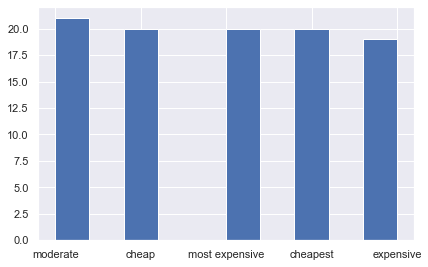

In [186]:
print(pd.qcut(df['price'], 5, labels=['cheapest', 'cheap', 'moderate', 'expensive', 'most expensive']).value_counts())
pd.qcut(df['price'], 5, labels=['cheapest', 'cheap', 'moderate', 'expensive', 'most expensive']).hist()

cheapest          64
cheap             24
moderate           8
most expensive     4
expensive          0
Name: price, dtype: int64


<AxesSubplot:>

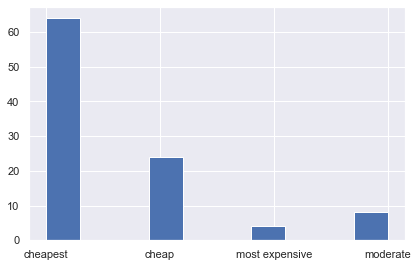

In [187]:
print(pd.cut(df['price'], 5, labels=['cheapest', 'cheap', 'moderate', 'expensive', 'most expensive']).value_counts())
pd.cut(df['price'], 5, labels=['cheapest', 'cheap', 'moderate', 'expensive', 'most expensive']).hist()

![group](./images/group.png)

While it is common and easy to apply aggregating functions/methods to groups via method chaining, using `.agg()` is more flexible:

In [79]:
df.groupby('kind').agg({'price': np.mean,
                        'min_nights': np.median,
                        'reviews': np.median,
                        'last_review': max})

price  min_nights  reviews last_review
kind                                                        
Entire home/apt  167.851852         2.5      6.5  2019-07-07
Private room      78.232558         2.0      2.0  2019-07-06
Shared room       47.333333         1.0     12.0  2019-06-29

If you need to use multiple aggregation functions for a column or a function with arguments, you should use a Lambda expression or a custom function.

In [188]:
def get_max_month_and_day(datetime_array):
    return max(datetime_array).strftime('%m/%d')


df_groups = df.groupby('kind').agg({'price': lambda x: round(np.mean(x)),
                                    'min_nights': lambda x: np.floor(np.median(x)),
                                    'reviews': lambda x: np.ceil(np.median(x)),
                                    'last_review': get_max_month_and_day})

df_groups

price  min_nights  reviews last_review
kind                                                   
Entire home/apt    168           2        7       07/07
Private room        78           2        2       07/06
Shared room         47           1       12       06/29

You can named the newly aggregated columns as well:

In [81]:
df.groupby('kind').agg(avg_price=('price', lambda x: round(np.mean(x))),
                       median_night_stayed=('min_nights', lambda x: np.floor(np.median(x))),
                       median_reviews=('reviews', lambda x: np.ceil(np.median(x))),
                       lastest_review=('last_review', get_max_month_and_day))

avg_price  median_night_stayed  median_reviews lastest_review
kind                                                                          
Entire home/apt        168                    2               7          07/07
Private room            78                    2               2          07/06
Shared room             47                    1              12          06/29

You can use `.get_group()` to access specific groups:

In [82]:
df.groupby('kind').get_group('Private room')

price          kind  min_nights  reviews last_review       lat
32366    110  Private room           1       43  2019-06-17  40.71766
9836      65  Private room           1      158  2019-06-23  40.74823
47955     75  Private room           1        0         NaT  40.83671
27800     40  Private room           5       12  2019-04-30  40.65314
11268    150  Private room           4        0         NaT  40.70076
31708     45  Private room          13        2  2018-07-31  40.66433
45228     70  Private room           3        2  2019-06-18  40.69660
23077     60  Private room           1        5  2018-05-13  40.63270
30552     35  Private room           1       78  2019-06-22  40.73726
28078    100  Private room           1        0         NaT  40.77752
7342     150  Private room           1        2  2015-04-24  40.67690
13216     63  Private room           7        1  2016-01-05  40.72003
40242     75  Private room           3        0         NaT  40.76681
30548     45  Private room          30        4  2019-04-30  40.78353
25340     45  Private room           3       58  2019-06-20  40.73726
10874     50  Private room           1        0         NaT  40.63378
35246     55  Private room           2       30  2019-06-11  40.69159
25568     90  Private room           2       67  2019-07-06  40.80666
42399     47  Private room          30        0         NaT  40.67721
44344     53  Private room           3        1  2019-06-04  40.82261
35593    110  Private room          21        0         NaT  40.68978
31905     70  Private room           7        2  2019-06-06  40.68409
10917     60  Private room           6        0         NaT  40.72522
20962    120  Private room           5       11  2019-05-23  40.80288
46633     75  Private room           1        0         NaT  40.68158
15000     65  Private room           3       11  2019-06-02  40.70487
41135     45  Private room           1        2  2019-03-07  40.67825
28499     42  Private room          20        0         NaT  40.71424
43931     79  Private room           2        2  2019-06-16  40.69267
41541     49  Private room           1        6  2019-06-03  40.76276
39023     75  Private room           2        0         NaT  40.68269
31873     60  Private room           1       33  2019-06-22  40.75686
17007    100  Private room           2        0         NaT  40.80153
2780     178  Private room           2        2  2016-09-04  40.71041
8555     149  Private room           1       56  2019-07-06  40.58977
21370     80  Private room           5        0         NaT  40.79149
5253     105  Private room           1      372  2019-06-21  40.71231
20536     50  Private room           2        5  2017-05-16  40.68376
29579     99  Private room           1       45  2019-06-17  40.85411
869       75  Private room           3       13  2019-01-31  40.69348
3939      80  Private room           3        3  2017-10-03  40.82349
27243    100  Private room           2        3  2017-11-16  40.72986
44022     75  Private room           3        0         NaT  40.83530

### Transforming Data with `.groupby()`

Although we most often use `.groupby()` for applying grouped aggregation, we can transform data by group without aggregating. Just for the sake of argument, let's say we want to normalize`reviews` by the maximum review number within it's own kind of AirBuB unit:

In [83]:
(df.groupby('kind')
   .transform(lambda x: x/max(x))['reviews']
   .to_frame())

reviews
32366  0.115591
37543  0.065502
9836   0.424731
41788  0.017467
46985  0.000000
...         ...
33518  0.100437
12741  0.013100
27243  0.008065
29819  0.497817
44022  0.000000

[100 rows x 1 columns]

Note that if you want the `kind` column back there isn't really an easy way (this is a known issue). You can do so by using `pd.concat()`:

In [189]:
pd.concat([df.groupby('kind')
             .transform(lambda x: x/max(x))['reviews']
             .to_frame(),
           df['kind']],
          axis=1)

reviews             kind
32366  0.115591     Private room
37543  0.065502  Entire home/apt
9836   0.424731     Private room
41788  0.017467  Entire home/apt
46985  0.000000  Entire home/apt
19554  0.882096  Entire home/apt
47955  0.000000     Private room
27800  0.032258     Private room
4037   0.733624  Entire home/apt
11268  0.000000     Private room
26396  0.000000  Entire home/apt
27883  0.000000  Entire home/apt
31708  0.005376     Private room
45228  0.005376     Private room
20129  0.017467  Entire home/apt
23698  0.340611  Entire home/apt
43481  0.008734  Entire home/apt
29753  0.235808  Entire home/apt
25905  0.000000  Entire home/apt
23077  0.013441     Private room
30552  0.209677     Private room
14616  1.000000      Shared room
31420  0.144105  Entire home/apt
28078  0.000000     Private room
1319   0.026201  Entire home/apt
7342   0.005376     Private room
13216  0.002688     Private room
6789   0.131004  Entire home/apt
40242  0.000000     Private room
46440  0.000000  Entire home/apt
30548  0.010753     Private room
38491  0.017467  Entire home/apt
30300  0.000000  Entire home/apt
25340  0.155914     Private room
30608  0.021834  Entire home/apt
36856  0.043668  Entire home/apt
10874  0.000000     Private room
35246  0.080645     Private room
35954  0.039301  Entire home/apt
25568  0.180108     Private room
42399  0.000000     Private room
36245  0.209607  Entire home/apt
39272  0.013100  Entire home/apt
48152  0.000000  Entire home/apt
27225  0.021834  Entire home/apt
17672  0.707424  Entire home/apt
44344  0.002688     Private room
24370  0.013100  Entire home/apt
35593  0.000000     Private room
31905  0.005376     Private room
35039  0.000000  Entire home/apt
45368  0.021834  Entire home/apt
15033  0.100437  Entire home/apt
10917  0.000000     Private room
20962  0.029570     Private room
46633  0.000000     Private room
42443  0.078603  Entire home/apt
1430   0.139738  Entire home/apt
8896   1.000000  Entire home/apt
42306  0.000000  Entire home/apt
11963  0.004367  Entire home/apt
15000  0.029570     Private room
2135   0.000000  Entire home/apt
18929  0.136364      Shared room
2387   0.593886  Entire home/apt
41135  0.005376     Private room
28499  0.000000     Private room
42343  0.030568  Entire home/apt
38531  0.017467  Entire home/apt
15881  0.026201  Entire home/apt
33121  0.117904  Entire home/apt
961    0.013100  Entire home/apt
22412  0.078603  Entire home/apt
14402  0.078603  Entire home/apt
43931  0.005376     Private room
41541  0.016129     Private room
39023  0.000000     Private room
31873  0.088710     Private room
10108  0.068182      Shared room
17007  0.000000     Private room
32999  0.048035  Entire home/apt
2780   0.005376     Private room
8555   0.150538     Private room
21370  0.000000     Private room
39385  0.061135  Entire home/apt
5253   1.000000     Private room
20536  0.013441     Private room
29579  0.120968     Private room
869    0.034946     Private room
2596   0.628821  Entire home/apt
17130  0.021834  Entire home/apt
19450  0.371179  Entire home/apt
41174  0.021834  Entire home/apt
3939   0.008065     Private room
13575  0.126638  Entire home/apt
33518  0.100437  Entire home/apt
12741  0.013100  Entire home/apt
27243  0.008065     Private room
29819  0.497817  Entire home/apt
44022  0.000000     Private room

There are some key words you can used (see cheat sheet) for these group by transformation, such as for cumulative sum:

In [190]:
pd.concat([df.groupby('kind')
             .transform('cumsum'),
           df['kind']],
          axis=1)

price  min_nights  reviews         lat             kind
32366    110           1       43    40.71766     Private room
37543     75           3       15    40.69854  Entire home/apt
9836     175           2      201    81.46589     Private room
41788    144           5       19    81.40159  Entire home/apt
46985    264           6       19   122.11655  Entire home/apt
19554    474           7      221   162.87850  Entire home/apt
47955    250           3      201   122.30260     Private room
27800    290           8      213   162.95574     Private room
4037     650          10      389   203.56559  Entire home/apt
11268    440          12      213   203.65650     Private room
26396    775          17      389   244.29102  Entire home/apt
27883   1175          22      389   285.03762  Entire home/apt
31708    485          25      215   244.32083     Private room
45228    555          28      217   285.01743     Private room
20129   1325          29      393   325.84829  Entire home/apt
23698   1380          32      471   366.55362  Entire home/apt
43481   1445          38      473   407.23745  Entire home/apt
29753   1694          40      527   447.94919  Entire home/apt
25905   1864          44      527   488.66865  Entire home/apt
23077    615          29      222   325.65013     Private room
30552    650          30      300   366.38739     Private room
14616     70           1       88    40.71556      Shared room
31420   2029          47      560   529.48581  Entire home/apt
28078    750          31      300   407.16491     Private room
1319    2129          52      566   570.21628  Entire home/apt
7342     900          32      302   447.84181     Private room
13216    963          39      303   488.56184     Private room
6789    2288          55      596   610.91614  Entire home/apt
40242   1038          42      303   529.32865     Private room
46440   2704          56      596   651.66446  Entire home/apt
30548   1083          72      307   570.11218     Private room
38491   2864          57      600   692.39307  Entire home/apt
30300   3264          58      600   733.12071  Entire home/apt
25340   1128          75      365   610.84944     Private room
30608   3453          59      605   773.78165  Entire home/apt
36856   3552          64      615   814.58119  Entire home/apt
10874   1178          76      365   651.48322     Private room
35246   1233          78      395   692.17481     Private room
35954   3662          66      624   855.25466  Entire home/apt
25568   1323          80      462   732.98147     Private room
42399   1370         110      462   773.65868     Private room
36245   3792          68      672   895.93551  Entire home/apt
39272   3937          69      675   936.53531  Entire home/apt
48152   4036          71      675   977.30300  Entire home/apt
27225   4286          73      680  1018.02810  Entire home/apt
17672   4373          74      842  1058.77209  Entire home/apt
44344   1423         113      463   814.48129     Private room
24370   4483          77      845  1099.48757  Entire home/apt
35593   1533         134      463   855.17107     Private room
31905   1603         141      465   895.85516     Private room
35039   4722         106      845  1140.23447  Entire home/apt
45368   5022         108      850  1180.94572  Entire home/apt
15033   5143         128      873  1221.56740  Entire home/apt
10917   1663         147      465   936.58038     Private room
20962   1783         152      476   977.38326     Private room
46633   1858         153      476  1018.06484     Private room
42443   5243         130      891  1262.39410  Entire home/apt
1430    5363         150      923  1303.08792  Entire home/apt
8896    5498         151     1152  1343.85011  Entire home/apt
42306   5986         153     1152  1384.60161  Entire home/apt
11963   6176         157     1153  1425.36597  Entire home/apt
15000   1923         156      487  1058.76971     Private room
2135    6276         158     1153  146

### Filtering Data with `.groupby()`

Filtering by groups are possible. For example, here we want to only keep the kinds of AirBnB units their within-group maximum number of review is above 100.

In [191]:
df.groupby('kind').filter(lambda x: max(x['reviews']) > 100)

price             kind  min_nights  reviews last_review       lat
32366    110     Private room           1       43  2019-06-17  40.71766
37543     75  Entire home/apt           3       15  2019-05-21  40.69854
9836      65     Private room           1      158  2019-06-23  40.74823
41788     69  Entire home/apt           2        4  2019-02-20  40.70305
46985    120  Entire home/apt           1        0         NaT  40.71496
19554    210  Entire home/apt           1      202  2019-06-15  40.76195
47955     75     Private room           1        0         NaT  40.83671
27800     40     Private room           5       12  2019-04-30  40.65314
4037     176  Entire home/apt           3      168  2019-06-15  40.68709
11268    150     Private room           4        0         NaT  40.70076
26396    125  Entire home/apt           7        0         NaT  40.72543
27883    400  Entire home/apt           5        0         NaT  40.74660
31708     45     Private room          13        2  2018-07-31  40.66433
45228     70     Private room           3        2  2019-06-18  40.69660
20129    150  Entire home/apt           7        4  2019-04-02  40.81067
23698     55  Entire home/apt           3       78  2019-06-23  40.70533
43481     65  Entire home/apt           6        2  2019-05-16  40.68383
29753    249  Entire home/apt           2       54  2019-07-06  40.71174
25905    170  Entire home/apt           4        0         NaT  40.71946
23077     60     Private room           1        5  2018-05-13  40.63270
30552     35     Private room           1       78  2019-06-22  40.73726
31420    165  Entire home/apt           3       33  2019-06-03  40.81716
28078    100     Private room           1        0         NaT  40.77752
1319     100  Entire home/apt           5        6  2012-09-14  40.73047
7342     150     Private room           1        2  2015-04-24  40.67690
13216     63     Private room           7        1  2016-01-05  40.72003
6789     159  Entire home/apt           3       30  2018-01-01  40.69986
40242     75     Private room           3        0         NaT  40.76681
46440    416  Entire home/apt           1        0         NaT  40.74832
30548     45     Private room          30        4  2019-04-30  40.78353
38491    160  Entire home/apt           1        4  2019-06-04  40.72861
30300    400  Entire home/apt           1        0         NaT  40.72764
25340     45     Private room           3       58  2019-06-20  40.73726
30608    189  Entire home/apt           1        5  2019-03-10  40.66094
36856     99  Entire home/apt           5       10  2019-06-29  40.79954
10874     50     Private room           1        0         NaT  40.63378
35246     55     Private room           2       30  2019-06-11  40.69159
35954    110  Entire home/apt           2        9  2019-06-23  40.67347
25568     90     Private room           2       67  2019-07-06  40.80666
42399     47     Private room          30        0         NaT  40.67721
36245    130  Entire home/apt           2       48  2019-06-27  40.68085
39272    145  Entire home/apt           1        3  2019-06-23  40.59980
48152     99  Entire home/apt           2        0         NaT  40.76769
27225    250  Entire home/apt           2        5  2018-08-05  40.72510
17672     87  Entire home/apt           1      162  2019-06-23  40.74399
44344     53     Private room           3        1  2019-06-04  40.82261
24370    110  Entire home/apt           3        3  2019-06-24  40.71548
35593    110     Private room          21        0         NaT  40.68978
31905     70     Private room           7        2  2019-06-06  40.68409
35039    239  Entire home/apt          29        0         NaT  40.74690
45368    300  Entire home/apt           2        5  2019-07-01  40.71125
15033    121  Entire home/apt          20       23  2019-04-13  40.62168
10917     60     Private room           6        0         NaT  40.72522
20962    120     Private room           5       11  2019-05-23  4

## Time Series Methods

Pandas has dedicated methods dealing with time series data.

In [87]:
df_pop = pd.read_html('https://en.wikipedia.org/w/index.php?title=World_population&oldid=948301297')[12]
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     21 non-null     int64 
 1   World                    21 non-null     int64 
 2   Asia                     21 non-null     object
 3   Africa                   21 non-null     object
 4   Europe                   21 non-null     object
 5   Latin America/Caribbean  21 non-null     object
 6   Northern America         21 non-null     object
 7   Oceania                  21 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.4+ KB


In [88]:
df_pop.loc[:, 'Asia':] = (df_pop.loc[:, 'Asia':]
                                .applymap(lambda x: int(''.join(x.split(' ')[0].split(',')))))

In [89]:
df_pop['Year'] = pd.to_datetime(df_pop['Year'], format='%Y')
df_pop = df_pop.set_index('Year')

df_pop

World  Asia  Africa  Europe  Latin America/Caribbean  \
Year                                                               
2000-01-01   6144  3741     811     726                      522   
2005-01-01   6542  3978     916     729                      558   
2010-01-01   6957  4210    1039     736                      591   
2015-01-01   7380  4434    1182     743                      624   
2020-01-01   7795  4641    1341     748                      654   
2025-01-01   8184  4823    1509     746                      682   
2030-01-01   8549  4974    1688     741                      706   
2035-01-01   8888  5096    1878     735                      726   
2040-01-01   9199  5189    2077     728                      742   
2045-01-01   9482  5253    2282     720                      754   
2050-01-01   9735  5290    2489     711                      762   
2055-01-01   9958  5302    2698     700                      767   
2060-01-01  10152  5289    2905     689                      768   
2065-01-01  10318  5256    3109     677                      765   
2070-01-01  10459  5207    3308     667                      759   
2075-01-01  10577  5143    3499     657                      750   
2080-01-01  10674  5068    3681     650                      739   
2085-01-01  10750  4987    3851     643                      726   
2090-01-01  10810  4901    4008     638                      711   
2095-01-01  10852  4812    4152     634                      696   
2100-01-01  10875  4719    4280     630                      680   

            Northern America  Oceania  
Year                                   
2000-01-01               312       31  
2005-01-01               327       34  
2010-01-01               343       37  
2015-01-01               357       40  
2020-01-01               369       43  
2025-01-01               380       45  
2030-01-01               391       48  
2035-01-01               401       50  
2040-01-01               410       53  
2045-01-01               418       55  
2050-01-01               425       57  
2055-01-01               432       60  
2060-01-01               439       62  
2065-01-01               447       64  
2070-01-01               454       66  
2075-01-01               461       67  
2080-01-01               468       69  
2085-01-01               474       71  
2090-01-01               479       72  
2095-01-01               485       74  
2100-01-01               491       75

If you use `df.shift()`, Pandas will automatically adjust the date-time index for you.

In [90]:
df_pop.shift(1)

World    Asia  Africa  Europe  Latin America/Caribbean  \
Year                                                                   
2000-01-01      NaN     NaN     NaN     NaN                      NaN   
2005-01-01   6144.0  3741.0   811.0   726.0                    522.0   
2010-01-01   6542.0  3978.0   916.0   729.0                    558.0   
2015-01-01   6957.0  4210.0  1039.0   736.0                    591.0   
2020-01-01   7380.0  4434.0  1182.0   743.0                    624.0   
2025-01-01   7795.0  4641.0  1341.0   748.0                    654.0   
2030-01-01   8184.0  4823.0  1509.0   746.0                    682.0   
2035-01-01   8549.0  4974.0  1688.0   741.0                    706.0   
2040-01-01   8888.0  5096.0  1878.0   735.0                    726.0   
2045-01-01   9199.0  5189.0  2077.0   728.0                    742.0   
2050-01-01   9482.0  5253.0  2282.0   720.0                    754.0   
2055-01-01   9735.0  5290.0  2489.0   711.0                    762.0   
2060-01-01   9958.0  5302.0  2698.0   700.0                    767.0   
2065-01-01  10152.0  5289.0  2905.0   689.0                    768.0   
2070-01-01  10318.0  5256.0  3109.0   677.0                    765.0   
2075-01-01  10459.0  5207.0  3308.0   667.0                    759.0   
2080-01-01  10577.0  5143.0  3499.0   657.0                    750.0   
2085-01-01  10674.0  5068.0  3681.0   650.0                    739.0   
2090-01-01  10750.0  4987.0  3851.0   643.0                    726.0   
2095-01-01  10810.0  4901.0  4008.0   638.0                    711.0   
2100-01-01  10852.0  4812.0  4152.0   634.0                    696.0   

            Northern America  Oceania  
Year                                   
2000-01-01               NaN      NaN  
2005-01-01             312.0     31.0  
2010-01-01             327.0     34.0  
2015-01-01             343.0     37.0  
2020-01-01             357.0     40.0  
2025-01-01             369.0     43.0  
2030-01-01             380.0     45.0  
2035-01-01             391.0     48.0  
2040-01-01             401.0     50.0  
2045-01-01             410.0     53.0  
2050-01-01             418.0     55.0  
2055-01-01             425.0     57.0  
2060-01-01             432.0     60.0  
2065-01-01             439.0     62.0  
2070-01-01             447.0     64.0  
2075-01-01             454.0     66.0  
2080-01-01             461.0     67.0  
2085-01-01             468.0     69.0  
2090-01-01             474.0     71.0  
2095-01-01             479.0     72.0  
2100-01-01             485.0     74.0

You can easily calculate percent-change:

In [91]:
df_pop.pct_change()

World      Asia    Africa    Europe  Latin America/Caribbean  \
Year                                                                          
2000-01-01       NaN       NaN       NaN       NaN                      NaN   
2005-01-01  0.064779  0.063352  0.129470  0.004132                 0.068966   
2010-01-01  0.063436  0.058321  0.134279  0.009602                 0.059140   
2015-01-01  0.060802  0.053207  0.137632  0.009511                 0.055838   
2020-01-01  0.056233  0.046685  0.134518  0.006729                 0.048077   
2025-01-01  0.049904  0.039216  0.125280 -0.002674                 0.042813   
2030-01-01  0.044599  0.031308  0.118622 -0.006702                 0.035191   
2035-01-01  0.039654  0.024528  0.112559 -0.008097                 0.028329   
2040-01-01  0.034991  0.018250  0.105964 -0.009524                 0.022039   
2045-01-01  0.030764  0.012334  0.098700 -0.010989                 0.016173   
2050-01-01  0.026682  0.007044  0.090710 -0.012500                 0.010610   
2055-01-01  0.022907  0.002268  0.083969 -0.015471                 0.006562   
2060-01-01  0.019482 -0.002452  0.076723 -0.015714                 0.001304   
2065-01-01  0.016351 -0.006239  0.070224 -0.017417                -0.003906   
2070-01-01  0.013665 -0.009323  0.064008 -0.014771                -0.007843   
2075-01-01  0.011282 -0.012291  0.057739 -0.014993                -0.011858   
2080-01-01  0.009171 -0.014583  0.052015 -0.010654                -0.014667   
2085-01-01  0.007120 -0.015983  0.046183 -0.010769                -0.017591   
2090-01-01  0.005581 -0.017245  0.040769 -0.007776                -0.020661   
2095-01-01  0.003885 -0.018160  0.035928 -0.006270                -0.021097   
2100-01-01  0.002119 -0.019327  0.030829 -0.006309                -0.022989   

            Northern America   Oceania  
Year                                    
2000-01-01               NaN       NaN  
2005-01-01          0.048077  0.096774  
2010-01-01          0.048930  0.088235  
2015-01-01          0.040816  0.081081  
2020-01-01          0.033613  0.075000  
2025-01-01          0.029810  0.046512  
2030-01-01          0.028947  0.066667  
2035-01-01          0.025575  0.041667  
2040-01-01          0.022444  0.060000  
2045-01-01          0.019512  0.037736  
2050-01-01          0.016746  0.036364  
2055-01-01          0.016471  0.052632  
2060-01-01          0.016204  0.033333  
2065-01-01          0.018223  0.032258  
2070-01-01          0.015660  0.031250  
2075-01-01          0.015419  0.015152  
2080-01-01          0.015184  0.029851  
2085-01-01          0.012821  0.028986  
2090-01-01          0.010549  0.014085  
2095-01-01          0.012526  0.027778  
2100-01-01          0.012371  0.013514

The `df.resample()` can be used to up-sample or down-sample your time series data.

In [92]:
df_pop.resample('1Y').mean().interpolate()

World    Asia  Africa  Europe  Latin America/Caribbean  \
Year                                                                   
2000-12-31   6144.0  3741.0   811.0   726.0                    522.0   
2001-12-31   6223.6  3788.4   832.0   726.6                    529.2   
2002-12-31   6303.2  3835.8   853.0   727.2                    536.4   
2003-12-31   6382.8  3883.2   874.0   727.8                    543.6   
2004-12-31   6462.4  3930.6   895.0   728.4                    550.8   
...             ...     ...     ...     ...                      ...   
2096-12-31  10856.6  4793.4  4177.6   633.2                    692.8   
2097-12-31  10861.2  4774.8  4203.2   632.4                    689.6   
2098-12-31  10865.8  4756.2  4228.8   631.6                    686.4   
2099-12-31  10870.4  4737.6  4254.4   630.8                    683.2   
2100-12-31  10875.0  4719.0  4280.0   630.0                    680.0   

            Northern America  Oceania  
Year                                   
2000-12-31             312.0     31.0  
2001-12-31             315.0     31.6  
2002-12-31             318.0     32.2  
2003-12-31             321.0     32.8  
2004-12-31             324.0     33.4  
...                      ...      ...  
2096-12-31             486.2     74.2  
2097-12-31             487.4     74.4  
2098-12-31             488.6     74.6  
2099-12-31             489.8     74.8  
2100-12-31             491.0     75.0  

[101 rows x 7 columns]

In [93]:
df_pop.resample('7Y').mean()

World    Asia  Africa  Europe  Latin America/Caribbean  \
Year                                                                   
2000-12-31   6144.0  3741.0   811.0   726.0                    522.0   
2007-12-31   6542.0  3978.0   916.0   729.0                    558.0   
2014-12-31   6957.0  4210.0  1039.0   736.0                    591.0   
2021-12-31   7587.5  4537.5  1261.5   745.5                    639.0   
2028-12-31   8184.0  4823.0  1509.0   746.0                    682.0   
2035-12-31   8718.5  5035.0  1783.0   738.0                    716.0   
2042-12-31   9199.0  5189.0  2077.0   728.0                    742.0   
2049-12-31   9482.0  5253.0  2282.0   720.0                    754.0   
2056-12-31   9846.5  5296.0  2593.5   705.5                    764.5   
2063-12-31  10152.0  5289.0  2905.0   689.0                    768.0   
2070-12-31  10388.5  5231.5  3208.5   672.0                    762.0   
2077-12-31  10577.0  5143.0  3499.0   657.0                    750.0   
2084-12-31  10674.0  5068.0  3681.0   650.0                    739.0   
2091-12-31  10780.0  4944.0  3929.5   640.5                    718.5   
2098-12-31  10852.0  4812.0  4152.0   634.0                    696.0   
2105-12-31  10875.0  4719.0  4280.0   630.0                    680.0   

            Northern America  Oceania  
Year                                   
2000-12-31             312.0     31.0  
2007-12-31             327.0     34.0  
2014-12-31             343.0     37.0  
2021-12-31             363.0     41.5  
2028-12-31             380.0     45.0  
2035-12-31             396.0     49.0  
2042-12-31             410.0     53.0  
2049-12-31             418.0     55.0  
2056-12-31             428.5     58.5  
2063-12-31             439.0     62.0  
2070-12-31             450.5     65.0  
2077-12-31             461.0     67.0  
2084-12-31             468.0     69.0  
2091-12-31             476.5     71.5  
2098-12-31             485.0     74.0  
2105-12-31             491.0     75.0

`df.rolling()` is Pandas answer for a generic window function especially for time series data, but works for other types of data as well. The "width" of the window are number of rows you'd want to include for each sliding window.

In [ ]:
df_pop.rolling(2).mean()

World    Asia  Africa  Europe  Latin America/Caribbean  \
Year                                                                   
2000-01-01      NaN     NaN     NaN     NaN                      NaN   
2005-01-01   6343.0  3859.5   863.5   727.5                    540.0   
2010-01-01   6749.5  4094.0   977.5   732.5                    574.5   
2015-01-01   7168.5  4322.0  1110.5   739.5                    607.5   
2020-01-01   7587.5  4537.5  1261.5   745.5                    639.0   
2025-01-01   7989.5  4732.0  1425.0   747.0                    668.0   
2030-01-01   8366.5  4898.5  1598.5   743.5                    694.0   
2035-01-01   8718.5  5035.0  1783.0   738.0                    716.0   
2040-01-01   9043.5  5142.5  1977.5   731.5                    734.0   
2045-01-01   9340.5  5221.0  2179.5   724.0                    748.0   
2050-01-01   9608.5  5271.5  2385.5   715.5                    758.0   
2055-01-01   9846.5  5296.0  2593.5   705.5                    764.5   
2060-01-01  10055.0  5295.5  2801.5   694.5                    767.5   
2065-01-01  10235.0  5272.5  3007.0   683.0                    766.5   
2070-01-01  10388.5  5231.5  3208.5   672.0                    762.0   
2075-01-01  10518.0  5175.0  3403.5   662.0                    754.5   
2080-01-01  10625.5  5105.5  3590.0   653.5                    744.5   
2085-01-01  10712.0  5027.5  3766.0   646.5                    732.5   
2090-01-01  10780.0  4944.0  3929.5   640.5                    718.5   
2095-01-01  10831.0  4856.5  4080.0   636.0                    703.5   
2100-01-01  10863.5  4765.5  4216.0   632.0                    688.0   

            Northern America  Oceania  
Year                                   
2000-01-01               NaN      NaN  
2005-01-01             319.5     32.5  
2010-01-01             335.0     35.5  
2015-01-01             350.0     38.5  
2020-01-01             363.0     41.5  
2025-01-01             374.5     44.0  
2030-01-01             385.5     46.5  
2035-01-01             396.0     49.0  
2040-01-01             405.5     51.5  
2045-01-01             414.0     54.0  
2050-01-01             421.5     56.0  
2055-01-01             428.5     58.5  
2060-01-01             435.5     61.0  
2065-01-01             443.0     63.0  
2070-01-01             450.5     65.0  
2075-01-01             457.5     66.5  
2080-01-01             464.5     68.0  
2085-01-01             471.0     70.0  
2090-01-01             476.5     71.5  
2095-01-01             482.0     73.0  
2100-01-01             488.0     74.5

![window](./images/window.png)

Pandas window functions can be applied to non-time series data as well (even if it makes little sense to do so.) Your index must be sorted in some ways for this to work.

In [ ]:
df.reset_index().rolling(2).mean()

Expanding window function is an alternative to rolling window functions, it can be visualized as such:


![expanding](./images/expanding.jpeg)

In [ ]:
df.reset_index().expanding(2).mean()

![combine](./images/combine.png)

Pandas merge are essentially similar to SQL joins, but with even more flexibility. 

![merge](./images/pandas_merge_examples.svg)

In [192]:
df_employees

LastName FirstName                Title  ReportsTo  BirthDate  \
EmployeeId                                                                  
1              Adams    Andrew      General Manager        NaN 1962-02-18   
2            Edwards     Nancy        Sales Manager        1.0 1958-12-08   
3            Peacock      Jane  Sales Support Agent        2.0 1973-08-29   
4               Park  Margaret  Sales Support Agent        2.0 1947-09-19   
5            Johnson     Steve  Sales Support Agent        2.0 1965-03-03   
6           Mitchell   Michael           IT Manager        1.0 1973-07-01   
7               King    Robert             IT Staff        6.0 1970-05-29   
8           Callahan     Laura             IT Staff        6.0 1968-01-09   

             HireDate                      Address        City State Country  \
EmployeeId                                                                     
1          2002-08-14          11120 Jasper Ave NW    Edmonton    AB  Canada   
2          2002-05-01                 825 8 Ave SW     Calgary    AB  Canada   
3          2002-04-01                1111 6 Ave SW     Calgary    AB  Canada   
4          2003-05-03             683 10 Street SW     Calgary    AB  Canada   
5          2003-10-17                 7727B 41 Ave     Calgary    AB  Canada   
6          2003-10-17         5827 Bowness Road NW     Calgary    AB  Canada   
7          2004-01-02  590 Columbia Boulevard West  Lethbridge    AB  Canada   
8          2004-03-04                  923 7 ST NW  Lethbridge    AB  Canada   

           PostalCode              Phone                Fax  \
EmployeeId                                                    
1             T5K 2N1  +1 (780) 428-9482  +1 (780) 428-3457   
2             T2P 2T3  +1 (403) 262-3443  +1 (403) 262-3322   
3             T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
4             T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
5             T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   
6             T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899   
7             T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   
8             T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772   

                               Email  
EmployeeId                            
1             andrew@chinookcorp.com  
2              nancy@chinookcorp.com  
3               jane@chinookcorp.com  
4           margaret@chinookcorp.com  
5              steve@chinookcorp.com  
6            michael@chinookcorp.com  
7             robert@chinookcorp.com  
8              laura@chinookcorp.com

In [193]:
df_customer = pd.read_sql(
    '''
    SELECT *
    FROM customers
    ''',
    conn
)

df_customer

CustomerId  FirstName      LastName  \
0            1       Luís     Gonçalves   
1            2     Leonie        Köhler   
2            3   François      Tremblay   
3            4      Bjørn        Hansen   
4            5  František   Wichterlová   
5            6     Helena          Holý   
6            7     Astrid        Gruber   
7            8       Daan       Peeters   
8            9       Kara       Nielsen   
9           10    Eduardo       Martins   
10          11  Alexandre         Rocha   
11          12    Roberto       Almeida   
12          13   Fernanda         Ramos   
13          14       Mark       Philips   
14          15   Jennifer      Peterson   
15          16      Frank        Harris   
16          17       Jack         Smith   
17          18   Michelle        Brooks   
18          19        Tim         Goyer   
19          20        Dan        Miller   
20          21      Kathy         Chase   
21          22    Heather       Leacock   
22          23       John        Gordon   
23          24      Frank       Ralston   
24          25     Victor       Stevens   
25          26    Richard    Cunningham   
26          27    Patrick          Gray   
27          28      Julia       Barnett   
28          29     Robert         Brown   
29          30     Edward       Francis   
30          31     Martha          Silk   
31          32      Aaron      Mitchell   
32          33      Ellie      Sullivan   
33          34       João     Fernandes   
34          35   Madalena       Sampaio   
35          36     Hannah     Schneider   
36          37       Fynn    Zimmermann   
37          38     Niklas      Schröder   
38          39    Camille       Bernard   
39          40  Dominique      Lefebvre   
40          41       Marc        Dubois   
41          42      Wyatt        Girard   
42          43   Isabelle       Mercier   
43          44      Terhi    Hämäläinen   
44          45   Ladislav        Kovács   
45          46       Hugh      O'Reilly   
46          47      Lucas       Mancini   
47          48   Johannes  Van der Berg   
48          49  Stanisław        Wójcik   
49          50    Enrique         Muñoz   
50          51     Joakim     Johansson   
51          52       Emma         Jones   
52          53       Phil        Hughes   
53          54      Steve        Murray   
54          55       Mark        Taylor   
55          56      Diego     Gutiérrez   
56          57       Luis         Rojas   
57          58      Manoj        Pareek   
58          59       Puja    Srivastava   

                                             Company  \
0   Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                               None   
2                                               None   
3                                               None   
4                                   JetBrains s.r.o.   
5                                               None   
6                                               None   
7                                               None   
8                                               None   
9                                   Woodstock Discos   
10                              Banco do Brasil S.A.   
11                                            Riotur   
12                                              None   
13                                             Telus   
14                                     Rogers Canada   
15                                       Google Inc.   
16                             Microsoft Corporation   
17                                              None   
18                                        Apple Inc.   
19                                              None   
20                                              None   
21                                              None   
22                                              None   
23                                              None   
24                     

In [194]:
df_merged = pd.merge(
    df_customer,
    df_employees,
    how='outer',
    left_on='SupportRepId',
    right_index=True,
    suffixes=('_customer', '_employee')
)

df_merged

CustomerId FirstName_customer LastName_customer  \
0.0          1.0               Luís         Gonçalves   
2.0          3.0           François          Tremblay   
11.0        12.0            Roberto           Almeida   
14.0        15.0           Jennifer          Peterson   
17.0        18.0           Michelle            Brooks   
18.0        19.0                Tim             Goyer   
23.0        24.0              Frank           Ralston   
28.0        29.0             Robert             Brown   
29.0        30.0             Edward           Francis   
32.0        33.0              Ellie          Sullivan   
36.0        37.0               Fynn        Zimmermann   
37.0        38.0             Niklas          Schröder   
41.0        42.0              Wyatt            Girard   
42.0        43.0           Isabelle           Mercier   
43.0        44.0              Terhi        Hämäläinen   
44.0        45.0           Ladislav            Kovács   
45.0        46.0               Hugh          O'Reilly   
51.0        52.0               Emma             Jones   
52.0        53.0               Phil            Hughes   
57.0        58.0              Manoj            Pareek   
58.0        59.0               Puja        Srivastava   
1.0          2.0             Leonie            Köhler   
5.0          6.0             Helena              Holý   
6.0          7.0             Astrid            Gruber   
10.0        11.0          Alexandre             Rocha   
13.0        14.0               Mark           Philips   
16.0        17.0               Jack             Smith   
20.0        21.0              Kathy             Chase   
24.0        25.0             Victor           Stevens   
27.0        28.0              Julia           Barnett   
30.0        31.0             Martha              Silk   
35.0        36.0             Hannah         Schneider   
40.0        41.0               Marc            Dubois   
46.0        47.0              Lucas           Mancini   
47.0        48.0           Johannes      Van der Berg   
49.0        50.0            Enrique             Muñoz   
50.0        51.0             Joakim         Johansson   
53.0        54.0              Steve            Murray   
56.0        57.0               Luis             Rojas   
3.0          4.0              Bjørn            Hansen   
4.0          5.0          František       Wichterlová   
7.0          8.0               Daan           Peeters   
8.0          9.0               Kara           Nielsen   
9.0         10.0            Eduardo           Martins   
12.0        13.0           Fernanda             Ramos   
15.0        16.0              Frank            Harris   
19.0        20.0                Dan            Miller   
21.0        22.0            Heather           Leacock   
22.0        23.0               John            Gordon   
25.0        26.0            Richard        Cunningham   
26.0        27.0            Patrick              Gray   
31.0        32.0              Aaron          Mitchell   
33.0        34.0               João         Fernandes   
34.0        35.0           Madalena           Sampaio   
38.0        39.0            Camille           Bernard   
39.0        40.0          Dominique          Lefebvre   
48.0        49.0          Stanisław            Wójcik   
54.0        55.0               Mark            Taylor   
55.0        56.0              Diego         Gutiérrez   
NaN          NaN                NaN               NaN   
NaN          NaN                NaN               NaN   
NaN          NaN                NaN               NaN   
NaN          NaN                NaN               NaN   
NaN          NaN                NaN               NaN   

                                               Company  \
0.0   Embraer - Empresa Brasileira de Aeronáutica S.A.   
2.0                                               None   
11.0                                            Riotur   
14.0                                     Rogers Canada   
17.0      

Quick reminder that you can always change Pandas' settings for it to display all of the columns. In fact, there are many things you can tinker with. Here are some common ones:

There are many options you can tinker with in the `pd.options` module. You can use `pd.get_option('option_name')` and `pd.set_option('option_name', value)` to display them or alter them. Here are some common ones to pass to the above methods:

- `display.max_rows` and `display.max_columns`: Determine the maximum number of rows/columns to display before using `...` to truncate the Data Frames or Series. There is a corresponding attribute `display.min_rows` and `display.min_columns`
- `display.max_colwidth`: Specify the maximum width of columns before truncating with `...`
- `display.max_info_columns`: Specifies the threshold for the number of columns `df.info()` would return
- `display.precisions`: Determines the precision (decimal place) for numeric values in Data Frames and Series.
- `display.chop_threhold`: Specify threshold for Pandas to floor small values to 0.
- `display.colheader_justify`: Specify `'left'` or `'right'` justification for column labels.
- `plotting.backend`: By default Pandas uses Matplotlib as its plotting backend. You can switch to other plotting libraries here, such as Plotly, Seaborn, Bokeh, etc.

If you want to go back to the default settings you can always use `pd.reset_option('option_name')` to accomplish that.

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
df_merged

## String Methods

There are vectorized version of most Python string manipulation methods in Pandas data frames, and you can access them via the `.str` attribute. 

Some of the behavior of the string methods are not exactly the same for Pandas objects as they are in base Python. We see this with `.str.split`, a frequently used method:

In [ ]:
df_merged['Address_customer'].str.split(' ')

With no argument, the text entry is split into a list but remain in a single cell within the data frame. You can access each element within the lists via `[]` notation, at the risk of `IndexError`. Pandas allows you to expand the list's elements into their own column in a data frame:

In [ ]:
df_merged['Address_customer'].str.split(' ', expand=True)

You can limit the number of split to get around the potential `IndexError`:

In [ ]:
df_merged['Address_customer'].str.split(' ', expand=True, n=1)

Unique in Pandas is the `.str.cat` method, which does the opposite of splitting:

In [ ]:
(df_merged['FirstName_customer']
  .str.cat(df_merged['LastName_customer'], sep=' ')
  .to_frame()
  .rename({'FirstName_customer': 'FullName_custormer'}, axis=1))

![plot](./images/plotting.png)

Pandas by default set it's plotting backend as MatplotLib, you can technically to almost everything you can with plotting in Pandas as you could in MPL. However, because you will be working through two layers of API at that point, any detail fine-tuning of a plot becomes a little unwieldy to adjust. I recommend using Pandas plotting for quick visualizations, and import MPL or other plotting libraries for any serious plotting.

You can change the backend of the plotting API easily (but you'd have to be sure you have the appropriate libraries installed.)

In [195]:
pd.set_option('plotting.backend', 'hvplot')

df.plot.scatter('price', 'min_nights')

:Scatter   [price]   (min_nights)

In [196]:
pd.set_option('plotting.backend', 'pandas_bokeh')

df.plot.scatter('price', 'min_nights')

Figure(id='1313', ...)

In [197]:
from IPython.display import HTML


pd.set_option('plotting.backend', 'plotly')

fig = df.plot.scatter('price', 'min_nights')
HTML(fig.to_html())

In [198]:
pd.set_option('plotting.backend', 'altair')

df.plot.scatter('price', 'min_nights')

alt.Chart(...)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='min_nights'>

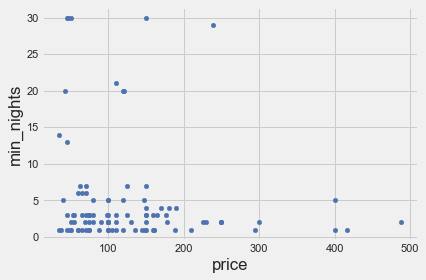

In [199]:
import matplotlib as mpl

"""
- default
- classic
- Solarize_Light2
- _classic_test
- bmh
- dark_background
- fast
- fivethrityeight
- ggplot
- grayscale
- seaborn, -bright, -dark, -dark-palette, -darkgrid, -deep, -muted, -notebook, -paper, -pastel, -poster, -talk, -ticks, -white, -whitegrid
- tableau-colorblind10
"""

pd.set_option('plotting.backend', 'matplotlib')
mpl.style.use('fivethirtyeight')

df.plot.scatter('price', 'min_nights')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='min_nights'>

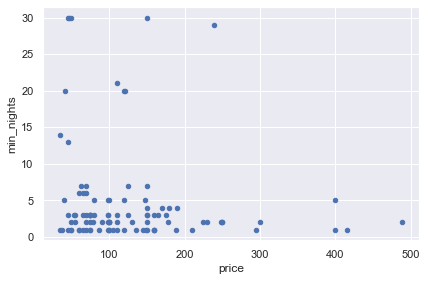

In [200]:
import seaborn as sns

"""
Available styles preset:
- darkgrid
- whitegrid
- dark
- white
- ticks
"""
sns.set(style='darkgrid')

df.plot.scatter('price', 'min_nights')

## Rules of Thumb to Keep in Mind

- Avoiding doing any kind of iteration with Pandas, there is probably a faster, vectorized way of going about it
- Know the differences between `.apply()`, `.transform()`, `.applymap()`, and `.filter()`:
    - <b>`.apply()`</b>: Apply a function column-wise or row-wise (specify with `axis`) as _data frame_
    - <b>`.transform()`</b>: Very similar to `.apply()`; function is applied to columns/rows but as a _series_, may only return a sequence (list/array/pd.Series) the same length as input
    - <b>`.applymap()`</b>: Apply function _element-wise_
    - <b>`.filter()`</b>: Apply function row or column-wise, may only return Boolean mask
    - <b>BONUS</b>: `.map()` in not implemented for data frames, but it is an equivalent method as `.applymap()` for Pandas series object.
- Using `.apply()` and their ilks are generally much faster than using for-loops (which you should never do) or `.iterrows()` (and related methods, slightly better than for-loops but still avoid if possible), but in the backend it is still doing iteration. If there are vectorized version method in Pandas or NumPy, always use those instead.

In [201]:
df_nums = pd.DataFrame(np.random.rand(100, 100))
df_nums

0         1         2         3         4         5         6   \
0   0.839084  0.361378  0.178026  0.768182  0.296850  0.198374  0.619168   
1   0.196601  0.996980  0.172381  0.403068  0.734196  0.146047  0.286288   
2   0.549893  0.549648  0.414903  0.480874  0.525255  0.471683  0.338921   
3   0.336684  0.343430  0.728401  0.011059  0.087012  0.750090  0.902882   
4   0.586777  0.011758  0.179746  0.932871  0.414508  0.233928  0.743360   
5   0.934080  0.262396  0.919171  0.278128  0.198808  0.099926  0.679718   
6   0.721302  0.897337  0.080927  0.157136  0.138694  0.321459  0.348559   
7   0.000027  0.521469  0.016760  0.867258  0.813160  0.734845  0.538742   
8   0.139693  0.794937  0.054161  0.486380  0.216245  0.608773  0.002054   
9   0.061327  0.255884  0.394008  0.479480  0.622277  0.101452  0.588216   
10  0.988901  0.771848  0.976673  0.439655  0.282476  0.311888  0.409610   
11  0.738725  0.143502  0.789143  0.032899  0.676642  0.063208  0.019962   
12  0.503195  0.816452  0.382528  0.516838  0.249963  0.730968  0.379093   
13  0.618642  0.559992  0.920284  0.686218  0.233103  0.155546  0.997985   
14  0.928657  0.315594  0.348423  0.293952  0.086386  0.071878  0.209534   
15  0.888400  0.718156  0.768327  0.101681  0.237895  0.556228  0.021610   
16  0.952076  0.642677  0.461794  0.613926  0.172293  0.739719  0.120170   
17  0.344330  0.580512  0.758507  0.933294  0.319084  0.469529  0.372958   
18  0.969130  0.430644  0.410886  0.876293  0.872771  0.356561  0.144208   
19  0.805007  0.409757  0.652377  0.787341  0.984060  0.091381  0.401338   
20  0.006162  0.727628  0.417351  0.240723  0.847083  0.842981  0.022998   
21  0.819002  0.490552  0.769433  0.631253  0.880625  0.496584  0.321192   
22  0.962023  0.122098  0.932215  0.653862  0.084136  0.130368  0.948278   
23  0.089517  0.018569  0.423817  0.323754  0.292018  0.042100  0.503080   
24  0.421805  0.481298  0.375600  0.715902  0.989471  0.827123  0.098551   
25  0.797201  0.224039  0.972448  0.208026  0.084464  0.918090  0.578907   
26  0.161907  0.775357  0.209853  0.649459  0.896365  0.731158  0.686492   
27  0.577028  0.358254  0.434586  0.022612  0.749625  0.438921  0.812500   
28  0.291330  0.254230  0.041706  0.359327  0.154319  0.365190  0.984003   
29  0.644326  0.578025  0.856740  0.536447  0.320348  0.165263  0.706154   
30  0.198655  0.307157  0.075903  0.681377  0.766063  0.152635  0.867657   
31  0.471951  0.678206  0.412837  0.324895  0.538050  0.050496  0.038693   
32  0.110714  0.227387  0.178324  0.478891  0.819425  0.405929  0.352535   
33  0.830572  0.746010  0.078897  0.424944  0.355659  0.298578  0.958654   
34  0.712147  0.185795  0.208911  0.012745  0.406208  0.817402  0.032140   
35  0.431421  0.486527  0.585533  0.203801  0.241224  0.448875  0.894190   
36  0.128019  0.754927  0.782511  0.823979  0.139528  0.497948  0.012195   
37  0.855363  0.512344  0.886522  0.926590  0.768699  0.067315  0.046068   
38  0.521236  0.068623  0.009537  0.641650  0.045486  0.343988  0.627602   
39  0.319396  0.102489  0.988503  0.886847  0.839225  0.038245  0.740642   
40  0.742175  0.357140  0.184575  0.788260  0.675062  0.671710  0.328426   
41  0.472807  0.381603  0.290477  0.738169  0.340488  0.801292  0.707076   
42  0.454737  0.305498  0.611324  0.311322  0.013488  0.166607  0.079176   
43  0.598012  0.047199  0.378977  0.649563  0.092691  0.914794  0.190769   
44  0.030209  0.482795  0.855003  0.277689  0.456647  0.073209  0.393303   
45  0.355086  0.827786  0.408526  0.867471  0.648704  0.399591  0.704322   
46  0.334472  0.761835  0.776036  0.220189  0.290827  0.891527  0.711225   
47  0.632865  0.245678  0.023486  0.007118  0.715790  0.427151  0.285411   
48  0.414237  0.754111  0.523933  0.174453  0.228150  0.474618  0.889861   
49  0.293078  0.465425  0.497543  0.588128  0.936835  0.623763  0.924840   
50  0.087666  0.740724  0.205778  0.287391  0.517569  0.379832  0.297069   
51  0.989670  0.991257  0.808527  0.733390  0.952198  0.51

In [202]:
%%timeit

df_nums.apply(sum)

8.24 ms ± 828 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [203]:
%%timeit

np.sum(df_nums)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
2.72 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


- If you defined a custom function and you want to turn it into a vectorized function, you can try to have NumPy automatically transform your function by using the `@np.vectorize` decorator. Further optimization might be possible using the `numba` library and with the `@numba.vectorize` decorator.
- If you can apply a function (vectorized or not) to a data frame, then you can also apply it in a grouped manner via `.groupby()`.
- You are not limited to using column labels in `.groupby()`; you can pass in a group mapping via dictionary or Pandas series, a list/array of labels, or even a function.
- Working with date-time data in Pandas can be complex, but this is not unique to Pandas but basically facts of life with Python. Pandas does its best in trying to conforming to base Python date-time convention. If you are working with data with a lot of date-time data, it's worth it to give the Pandas datetime [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) a quick skim through. There is also a related [guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html) on time deltas.
- Conditionally formatting is possible but not commonly used on Pandas data frame. This can be a powerful visualization alternative to plotting. Check the guide on styling [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

In [204]:
df_nums.style.applymap(lambda x: 'color: blue' if x >= 0.5 else 'color: red')

## Useful Resources

The best place to look, other than Googling for StackOverflow posts, really is at the Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html). The library is actively being developed, and the implementation and API for Pandas changes frequently. Therefore, as mentioned at the beginning of the workshop, it is must more fruitful to have a general concept of what Pandas is capable of, and also to know where to look for detailed execution. Here are some further suggestion:

- Check out the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) of Pandas; maybe spend an hour each day just to work through most of it.
- The Pandas ["Cookbook"](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html) in particular is full of useful code snippets for various tasks.
- If you are new to Pandas, but are very familiar to similar tools like R, SQL, SAS, or Stata, Pandas has a [guide](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html) that translates tasks from those tools to Pandas.
- Many other Python (and even non-Python) libraries and modules have APIs that can interface with Pandas. Check those out [here](https://pandas.pydata.org/pandas-docs/stable/ecosystem.html). Particularly for data science:
    - [**sklearn-pandas**](https://github.com/scikit-learn-contrib/sklearn-pandas): Provides useful functionality for using data frames directly in scikit-learn models
    - [**pandas-datareader**](https://pydata.github.io/pandas-datareader/): For accessing large data set remotely via the Pandas API (e.g. Quandl)
    - [**GeoPandas**](https://github.com/geopandas/geopandas): Provide shape-file-like functionality to Pandas
    - [**PandaParallel**](https://github.com/nalepae/pandarallel): Using `df.apply` is generally slow; PandaParallel makes this much faster by paralellizing the process across your CPU cores.
    - [**Pandas-Profiling**](https://github.com/pandas-profiling/pandas-profiling): Automate and create HTML interactive profile of your data. This can automate many of your initial EDA.
- If you are dealing with some exotic data source, chances are there's a way for Pandas to read the data into a data frame. Check out all IO support [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).
- There are tons of good (...and bad) Pandas tutorial out there, the official Pandas documentation links to some good ones [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html). There are not many Pandas related books out there, and those that are published are often outdated. Here are a couple good ones that I have read:
    - <a href="https://payhip.com/b/6TU0">Memorable Pandas</a> by Jeff Hale. Short and kinda overpriced, but a very good entry level book for learning Pandas. Also very up-to-date, covers Pandas v1.0+.
    - <a href="https://github.com/chendaniely/pandas_for_everyone">Pandas for Everyone</a> by Daniel Chen. Much more detailed and longer book on Pandas, covers a lot more ground but quite a bit denser then the Hale book. A little outdated; does not cover v1.0.

Copyright &copy; 2020, [Matt Chan](https://github.com/thewchan/). The code of this notebook is licensed under [GNU GPLv3](https://www.gnu.org/licenses/gpl-3.0-standalone.html); the non-code contend of this notebook is licensed under [CC-BY-SA-4.0](https://creativecommons.org/licenses/by-sa/4.0/); images from the Pandas cheat sheet is created by [Irv Iustig](https://www.princeton.com/); window function image created by [Tony Yiu](https://medium.com/alpha-beta-blog), and additional Pandas merge image created by [The Pragmatic Institute](https://www.pragmaticinstitute.com/). This notebook constitute a fair-use of any copyrighted material as provided for in [section 107](https://www.copyright.gov/title17/92chap1.html#107) of the US copyright law.